# 6.3 Development of Comparison Graphs for Stock Predictions

This notebook presents the code utilized to generate the graphs showcased in the file [6.1 Report of Comparison Graphs for Stock Predictions](https://www.dropbox.com/scl/fi/iajnw4rdxc5fki75r8jar/6.2-Report-of-Comparison-Graphs-for-Stock-Predictions.pdf?rlkey=b4heobm04zg6c0w5vni83c8tr&dl=0).
This code create graphs for four stocks AAPL, TSLA, F, and WMT. It shows the real stock values and predictions from three models (Random Forest, MLP, and XGBoost). To make things clear, our team picked the best performing model settings for each stock. We mainly considered Mean Percentage Error (MPE) and Mean Time Taken (MTT) for choosing these settings

In [ ]:
globals().clear
import time
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Install Libraries
# mount Google Drive
from google.colab import drive
drive.mount('/content/colabIntern')

# Make sure to modify this to be for the specific folder in drive that you are working on

%cd "/content/colabIntern/MyDrive/2023/Langara/Capstone Project/Collab/Final Documentation/Predicted vs Actual Data frames "
#%cd "/content/colabIntern/MyDrive/Capstone/Capstone Project/Collab/Final Documentation/Predicted vs Actual Data frames "


Mounted at /content/colabIntern
/content/colabIntern/.shortcut-targets-by-id/1lwwFhOdnZo3Bx0mzGW8l1qPio2d8s1TV/Langara/Capstone Project/Collab/Final Documentation/Predicted vs Actual Data frames 


In [ ]:
#Random Forest: Portfolio
P_RF240_100=pd.read_excel('RandomForest/Portfolio/RandomForest240_n_estimators100_max_depth_100.xlsx')
P_RF240_300=pd.read_excel('RandomForest/Portfolio/RandomForest240_n_estimators300_max_depth_100.xlsx')
P_RF60_100=pd.read_excel('RandomForest/Portfolio/RandomForest60_n_estimators100_max_depth_100.xlsx')
P_RF60_300=pd.read_excel('RandomForest/Portfolio/RandomForest60_n_estimators300_max_depth_100.xlsx')
#Random Forest: AAPL
AAPL_RF240_100=pd.read_excel('RandomForest/Individual stock/fixed/RandomForest240_APPL_n_estimators100_max_depth100.xlsx')
AAPL_RF240_300=pd.read_excel('RandomForest/Individual stock/fixed/RandomForest240_APPL_n_estimators300_max_depth100.xlsx')
AAPL_RF60_100=pd.read_excel('RandomForest/Individual stock/fixed/RandomForest60_APPL_n_estimators100_max_depth100.xlsx')
AAPL_RF60_300=pd.read_excel('RandomForest/Individual stock/fixed/RandomForest60_APPL_n_estimators300_max_depth100.xlsx')

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


# Random Forest

In [ ]:
#Random Forest: TSLA
TSLA_RF240_100=pd.read_excel('RandomForest/Individual stock/fixed/RandomForest240_TSLA_n_estimators100_max_depth100.xlsx')
TSLA_RF240_300=pd.read_excel('RandomForest/Individual stock/fixed/RandomForest240_TSLA_n_estimators300_max_depth100.xlsx')
TSLA_RF60_100=pd.read_excel('RandomForest/Individual stock/fixed/RandomForest60_TSLA_n_estimators100_max_depth100.xlsx')
TSLA_RF60_300=pd.read_excel('RandomForest/Individual stock/fixed/RandomForest60_TSLA_n_estimators300_max_depth100.xlsx')

In [ ]:
#Random Forest: F
F_RF240_100=pd.read_excel('RandomForest/Individual stock/fixed/RandomForest240_F_n_estimators100_max_depth100.xlsx')
F_RF240_300=pd.read_excel('RandomForest/Individual stock/fixed/RandomForest240_F_n_estimators300_max_depth100.xlsx')
F_RF60_100=pd.read_excel('RandomForest/Individual stock/fixed/RandomForest60_F_n_estimators100_max_depth100.xlsx')
F_RF60_300=pd.read_excel('RandomForest/Individual stock/fixed/RandomForest60_F_n_estimators300_max_depth100.xlsx')

In [ ]:
#Random Forest: WMT
WMT_RF240_100=pd.read_excel('RandomForest/Individual stock/fixed/RandomForest240_WMT_n_estimators100_max_depth100.xlsx')
WMT_RF240_300=pd.read_excel('RandomForest/Individual stock/fixed/RandomForest240_WMT_n_estimators300_max_depth100.xlsx')
WMT_RF60_100=pd.read_excel('RandomForest/Individual stock/fixed/RandomForest60_WMT_n_estimators100_max_depth100.xlsx')
WMT_RF60_300=pd.read_excel('RandomForest/Individual stock/fixed/RandomForest60_WMT_n_estimators300_max_depth100.xlsx')

In [ ]:
# In this section we merge the predictions of the actual values with the predictions from the individual stock and prediction using the portfolio
# 240-100
stock='AAPL'
AAPL_240_100=pd.merge(left=P_RF240_100[P_RF240_100['stock_Id']==stock],right=AAPL_RF240_100,on=['DATETIME','ACTUAL'],how='inner',suffixes=['_Portfolio','_stock'])[['stock_Id','DATETIME','ACTUAL','PREDICTED_Portfolio','PREDICTED_stock']]
stock='TSLA'
TSLA_240_100=pd.merge(left=P_RF240_100[P_RF240_100['stock_Id']==stock],right=TSLA_RF240_100,on=['DATETIME','ACTUAL'],how='inner',suffixes=['_Portfolio','_stock'])[['stock_Id','DATETIME','ACTUAL','PREDICTED_Portfolio','PREDICTED_stock']]
stock='F'
F_240_100=pd.merge(left=P_RF240_100[P_RF240_100['stock_Id']==stock],right=F_RF240_100,on=['DATETIME','ACTUAL'],how='inner',suffixes=['_Portfolio','_stock'])[['stock_Id','DATETIME','ACTUAL','PREDICTED_Portfolio','PREDICTED_stock']]
stock='WMT'
WMT_240_100=pd.merge(left=P_RF240_100[P_RF240_100['stock_Id']==stock],right=WMT_RF240_100,on=['DATETIME','ACTUAL'],how='inner',suffixes=['_Portfolio','_stock'])[['stock_Id','DATETIME','ACTUAL','PREDICTED_Portfolio','PREDICTED_stock']]
# 240-300
stock='AAPL'
AAPL_240_300=pd.merge(left=P_RF240_300[P_RF240_300['stock_Id']==stock],right=AAPL_RF240_300,on=['DATETIME','ACTUAL'],how='inner',suffixes=['_Portfolio','_stock'])[['stock_Id','DATETIME','ACTUAL','PREDICTED_Portfolio','PREDICTED_stock']]
stock='TSLA'
TSLA_240_300=pd.merge(left=P_RF240_300[P_RF240_300['stock_Id']==stock],right=TSLA_RF240_300,on=['DATETIME','ACTUAL'],how='inner',suffixes=['_Portfolio','_stock'])[['stock_Id','DATETIME','ACTUAL','PREDICTED_Portfolio','PREDICTED_stock']]
stock='F'
F_240_300=pd.merge(left=P_RF240_300[P_RF240_300['stock_Id']==stock],right=F_RF240_300,on=['DATETIME','ACTUAL'],how='inner',suffixes=['_Portfolio','_stock'])[['stock_Id','DATETIME','ACTUAL','PREDICTED_Portfolio','PREDICTED_stock']]
stock='WMT'
WMT_240_300=pd.merge(left=P_RF240_300[P_RF240_300['stock_Id']==stock],right=WMT_RF240_300,on=['DATETIME','ACTUAL'],how='inner',suffixes=['_Portfolio','_stock'])[['stock_Id','DATETIME','ACTUAL','PREDICTED_Portfolio','PREDICTED_stock']]
# 60-100
stock='AAPL'
AAPL_60_100=pd.merge(left=P_RF60_100[P_RF60_100['stock_Id']==stock],right=AAPL_RF60_100,on=['DATETIME','ACTUAL'],how='inner',suffixes=['_Portfolio','_stock'])[['stock_Id','DATETIME','ACTUAL','PREDICTED_Portfolio','PREDICTED_stock']]
stock='TSLA'
TSLA_60_100=pd.merge(left=P_RF60_100[P_RF60_100['stock_Id']==stock],right=TSLA_RF60_100,on=['DATETIME','ACTUAL'],how='inner',suffixes=['_Portfolio','_stock'])[['stock_Id','DATETIME','ACTUAL','PREDICTED_Portfolio','PREDICTED_stock']]
stock='F'
F_60_100=pd.merge(left=P_RF60_100[P_RF60_100['stock_Id']==stock],right=F_RF60_100,on=['DATETIME','ACTUAL'],how='inner',suffixes=['_Portfolio','_stock'])[['stock_Id','DATETIME','ACTUAL','PREDICTED_Portfolio','PREDICTED_stock']]
stock='WMT'
WMT_60_100=pd.merge(left=P_RF60_100[P_RF60_100['stock_Id']==stock],right=WMT_RF60_100,on=['DATETIME','ACTUAL'],how='inner',suffixes=['_Portfolio','_stock'])[['stock_Id','DATETIME','ACTUAL','PREDICTED_Portfolio','PREDICTED_stock']]
# 60-300
stock='AAPL'
AAPL_60_300=pd.merge(left=P_RF60_300[P_RF60_300['stock_Id']==stock],right=AAPL_RF60_300,on=['DATETIME','ACTUAL'],how='inner',suffixes=['_Portfolio','_stock'])[['stock_Id','DATETIME','ACTUAL','PREDICTED_Portfolio','PREDICTED_stock']]
stock='TSLA'
TSLA_60_300=pd.merge(left=P_RF60_300[P_RF60_300['stock_Id']==stock],right=TSLA_RF60_300,on=['DATETIME','ACTUAL'],how='inner',suffixes=['_Portfolio','_stock'])[['stock_Id','DATETIME','ACTUAL','PREDICTED_Portfolio','PREDICTED_stock']]
stock='F'
F_60_300=pd.merge(left=P_RF60_300[P_RF60_300['stock_Id']==stock],right=F_RF60_300,on=['DATETIME','ACTUAL'],how='inner',suffixes=['_Portfolio','_stock'])[['stock_Id','DATETIME','ACTUAL','PREDICTED_Portfolio','PREDICTED_stock']]
stock='WMT'
WMT_60_300=pd.merge(left=P_RF60_300[P_RF60_300['stock_Id']==stock],right=WMT_RF60_300,on=['DATETIME','ACTUAL'],how='inner',suffixes=['_Portfolio','_stock'])[['stock_Id','DATETIME','ACTUAL','PREDICTED_Portfolio','PREDICTED_stock']]

## AAPL

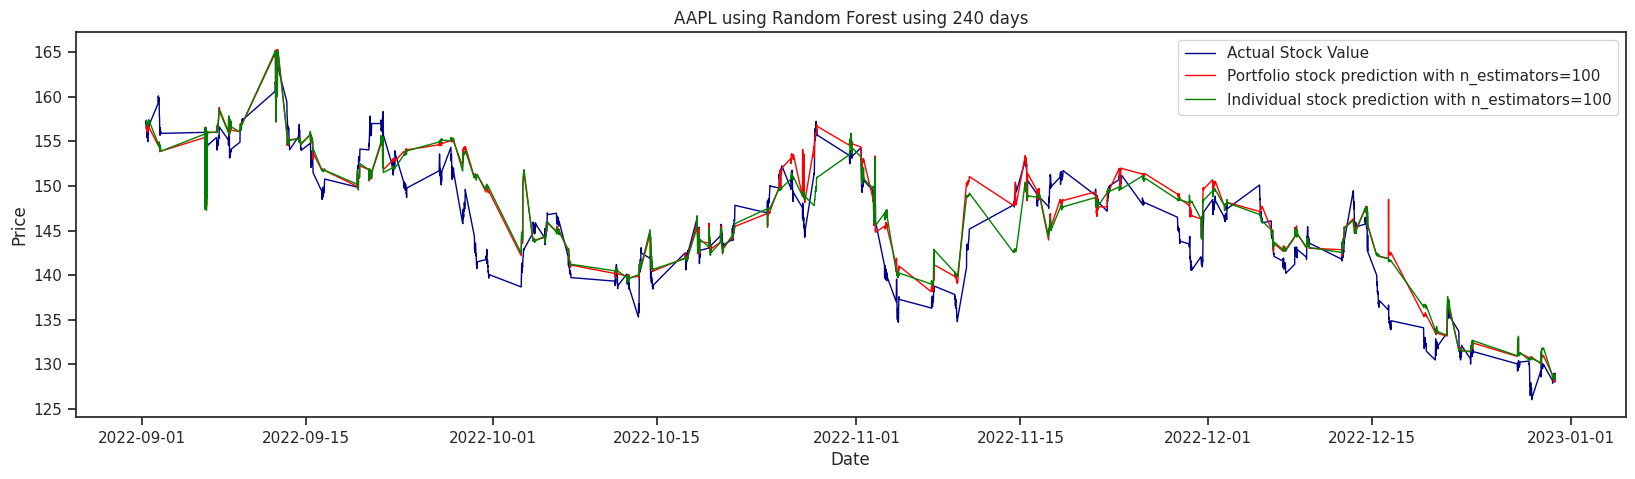

In [ ]:
plt.figure(figsize=(20,5))
sns.set(style='ticks')
linewidth=1
sns.lineplot(data=AAPL_240_100,x='DATETIME',y='ACTUAL',label='Actual Stock Value',linewidth=linewidth, color='darkblue')
sns.lineplot(data=AAPL_240_100,x='DATETIME',y='PREDICTED_Portfolio',label='Portfolio stock prediction with n_estimators=100',linewidth=linewidth,color='red') # Although the 300 model showed slightly better results in terms of MAPE and MPE metrics, the 100 model was chosen due to its lower MTT.
sns.lineplot(data=AAPL_240_100,x='DATETIME',y='PREDICTED_stock',label='Individual stock prediction with n_estimators=100',linewidth=linewidth,color='green')  #Although the 300 model showed slightly better results in terms of MAPE and MPE metrics, the 100 model was chosen due to its lower MTT.
#sns.lineplot(data=AAPL_240_300,x='DATETIME',y='PREDICTED_Portfolio',label='Portfolio300',linewidth=linewidth)
#sns.lineplot(data=AAPL_240_300,x='DATETIME',y='PREDICTED_stock',label='Individual300',linewidth=linewidth)
plt.title('AAPL using Random Forest using 240 days')
plt.ylabel('Price')
plt.xlabel('Date')

plt.show()

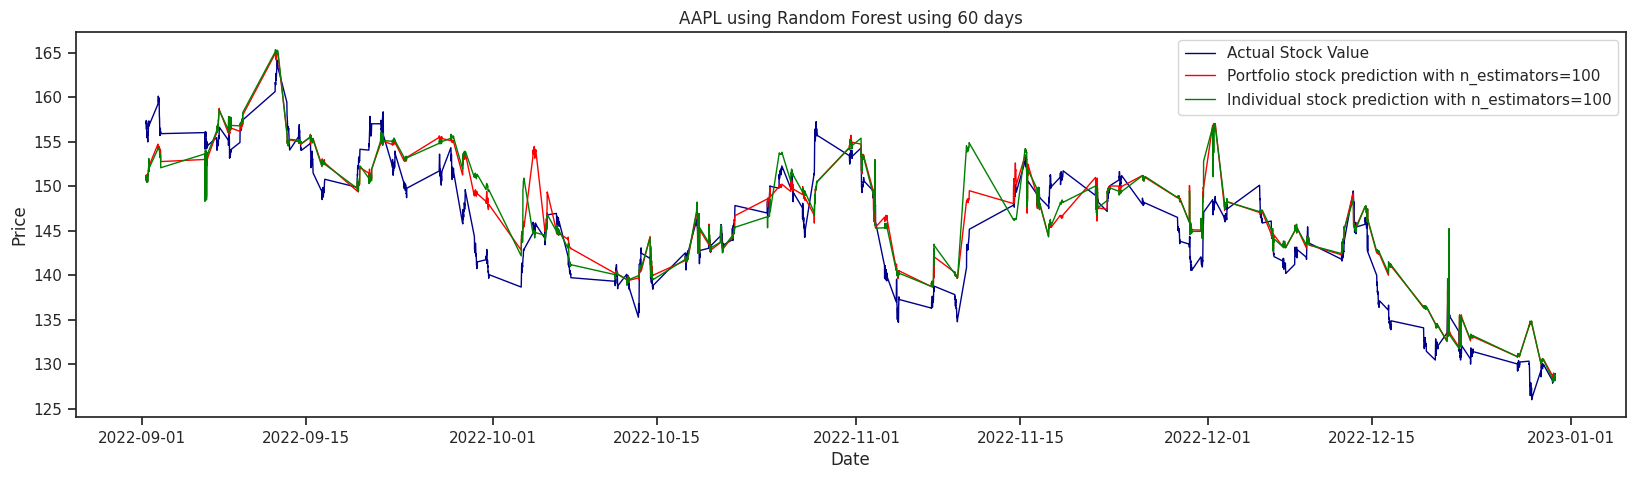

In [ ]:
plt.figure(figsize=(20,5))
sns.set(style='ticks')
linewidth=1
sns.lineplot(data=AAPL_60_100,x='DATETIME',y='ACTUAL',label='Actual Stock Value',linewidth=linewidth, color='darkblue')
sns.lineplot(data=AAPL_60_100,x='DATETIME',y='PREDICTED_Portfolio',label='Portfolio stock prediction with n_estimators=100',linewidth=linewidth,color='red') # Although the 300 model showed slightly better results in terms of MAPE and MPE metrics, the 100 model was chosen due to its lower MTT.
sns.lineplot(data=AAPL_60_100,x='DATETIME',y='PREDICTED_stock',label='Individual stock prediction with n_estimators=100',linewidth=linewidth,color='green')  #Although the 300 model showed slightly better results in terms of MAPE and MPE metrics, the 100 model was chosen due to its lower MTT.
#sns.lineplot(data=AAPL_60_300,x='DATETIME',y='PREDICTED_Portfolio',label='Portfolio300',linewidth=linewidth)
#sns.lineplot(data=AAPL_60_300,x='DATETIME',y='PREDICTED_stock',label='Individual300',linewidth=linewidth)
plt.title('AAPL using Random Forest using 60 days')
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()

## F

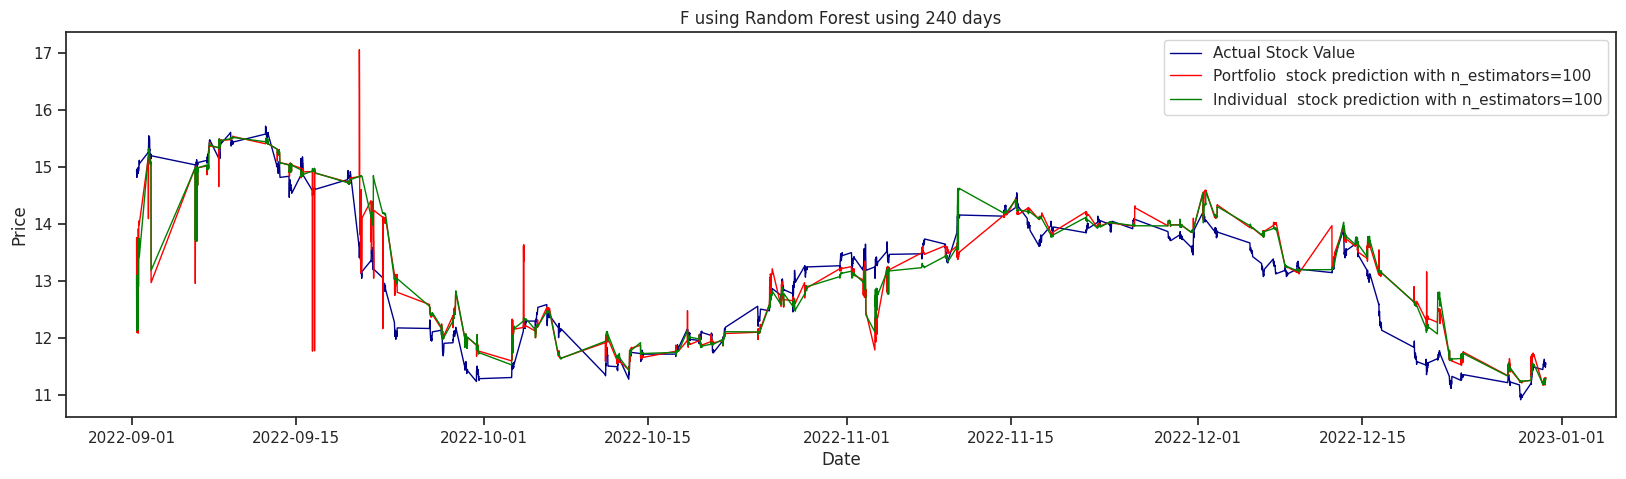

In [ ]:
plt.figure(figsize=(20,5))
sns.set(style='ticks')
linewidth=1
sns.lineplot(data=F_240_100,x='DATETIME',y='ACTUAL',label='Actual Stock Value',linewidth=linewidth, color='darkblue')
sns.lineplot(data=F_240_100,x='DATETIME',y='PREDICTED_Portfolio',label='Portfolio  stock prediction with n_estimators=100',linewidth=linewidth,color='red') # Although the 300 model showed slightly better results in terms of MAPE and MPE metrics, the 100 model was chosen due to its lower MTT.
sns.lineplot(data=F_240_100,x='DATETIME',y='PREDICTED_stock',label='Individual  stock prediction with n_estimators=100',linewidth=linewidth,color='green')  #Although the 300 model showed slightly better results in terms of MAPE and MPE metrics, the 100 model was chosen due to its lower MTT.
#sns.lineplot(data=F_240_300,x='DATETIME',y='PREDICTED_Portfolio',label='Portfolio300',linewidth=linewidth)
#sns.lineplot(data=F_240_300,x='DATETIME',y='PREDICTED_stock',label='Individual300',linewidth=linewidth)
plt.title('F using Random Forest using 240 days')
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()

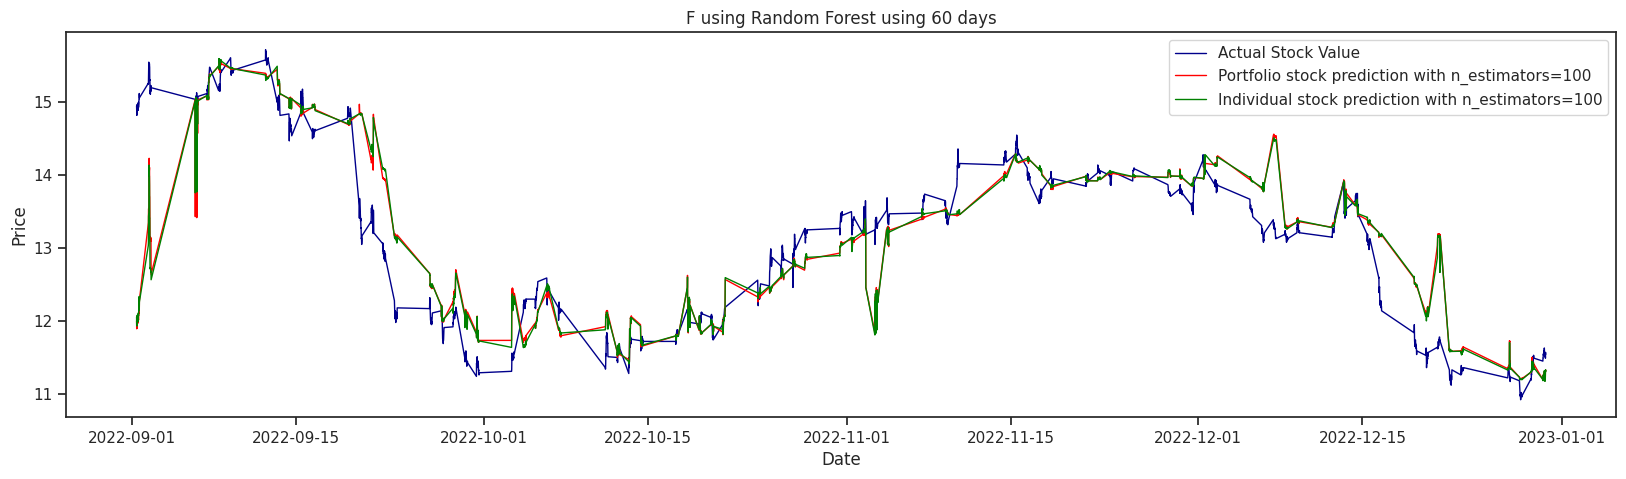

In [ ]:
plt.figure(figsize=(20,5))
sns.set(style='ticks')
linewidth=1
sns.lineplot(data=F_60_100,x='DATETIME',y='ACTUAL',label='Actual Stock Value',linewidth=linewidth, color='darkblue')
sns.lineplot(data=F_60_100,x='DATETIME',y='PREDICTED_Portfolio',label='Portfolio stock prediction with n_estimators=100',linewidth=linewidth,color='red') # Although the 300 model showed slightly better results in terms of MAPE and MPE metrics, the 100 model was chosen due to its lower MTT.
sns.lineplot(data=F_60_100,x='DATETIME',y='PREDICTED_stock',label='Individual stock prediction with n_estimators=100',linewidth=linewidth,color='green')  #Although the 300 model showed slightly better results in terms of MAPE and MPE metrics, the 100 model was chosen due to its lower MTT.
#sns.lineplot(data=F_60_300,x='DATETIME',y='PREDICTED_Portfolio',label='Portfolio300',linewidth=linewidth)
#sns.lineplot(data=F_60_300,x='DATETIME',y='PREDICTED_stock',label='Individual300',linewidth=linewidth)
plt.title('F using Random Forest using 60 days')
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()

## TSLA


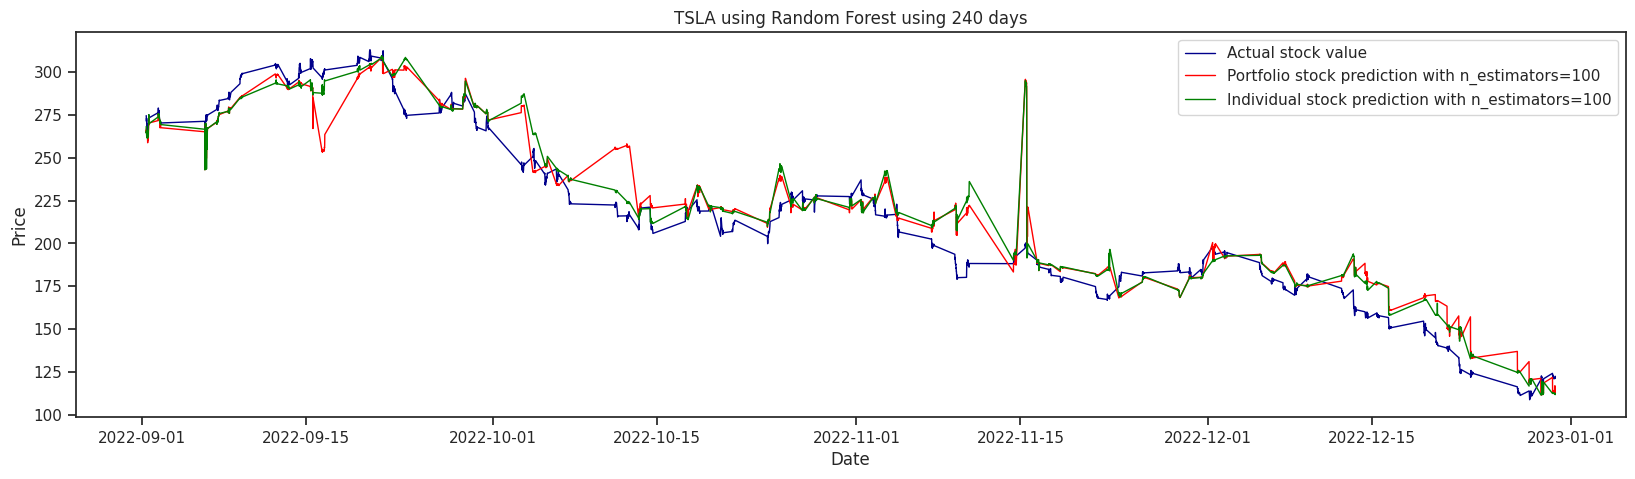

In [ ]:
plt.figure(figsize=(20,5))
sns.set(style='ticks')
linewidth=1
sns.lineplot(data=TSLA_240_100,x='DATETIME',y='ACTUAL',label='Actual stock value',linewidth=linewidth, color='darkblue')
sns.lineplot(data=TSLA_240_100,x='DATETIME',y='PREDICTED_Portfolio',label='Portfolio stock prediction with n_estimators=100',linewidth=linewidth,color='red') # Although the 300 model showed slightly better results in terms oTSLA MAPE and MPE metrics, the 100 model was chosen due to its lower MTT.
sns.lineplot(data=TSLA_240_100,x='DATETIME',y='PREDICTED_stock',label='Individual stock prediction with n_estimators=100',linewidth=linewidth,color='green')  #Although the 300 model showed slightly better results in terms oTSLA MAPE and MPE metrics, the 100 model was chosen due to its lower MTT.
#sns.lineplot(data=TSLA_240_300,x='DATETIME',y='PREDICTED_PortTSLAolio',label='PortTSLAolio300',linewidth=linewidth)
#sns.lineplot(data=TSLA_240_300,x='DATETIME',y='PREDICTED_stock',label='Individual300',linewidth=linewidth)
plt.title('TSLA using Random Forest using 240 days')
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()

In [ ]:
TSLA_240_100[TSLA_240_100.PREDICTED_stock>275]

,stock_Id,DATETIME,ACTUAL,PREDICTED_Portfolio,PREDICTED_stock
21,TSLA,2022-09-01 14:45:00,273.67,273.3571,275.2146
26,TSLA,2022-09-02 10:00:00,277.20,275.1884,275.1749
27,TSLA,2022-09-02 10:15:00,279.10,275.7525,275.8097
28,TSLA,2022-09-02 10:30:00,278.86,275.4168,275.1518
29,TSLA,2022-09-02 10:45:00,276.44,275.3665,275.1597
...,...,...,...,...,...
1184,TSLA,2022-11-15 11:30:00,198.15,294.5042,293.3938
1185,TSLA,2022-11-15 11:45:00,198.93,294.4763,293.3691
1186,TSLA,2022-11-15 12:00:00,198.10,293.7042,291.7581
1187,TSLA,2022-11-15 12:15:00,197.85,293.5747,291.7620


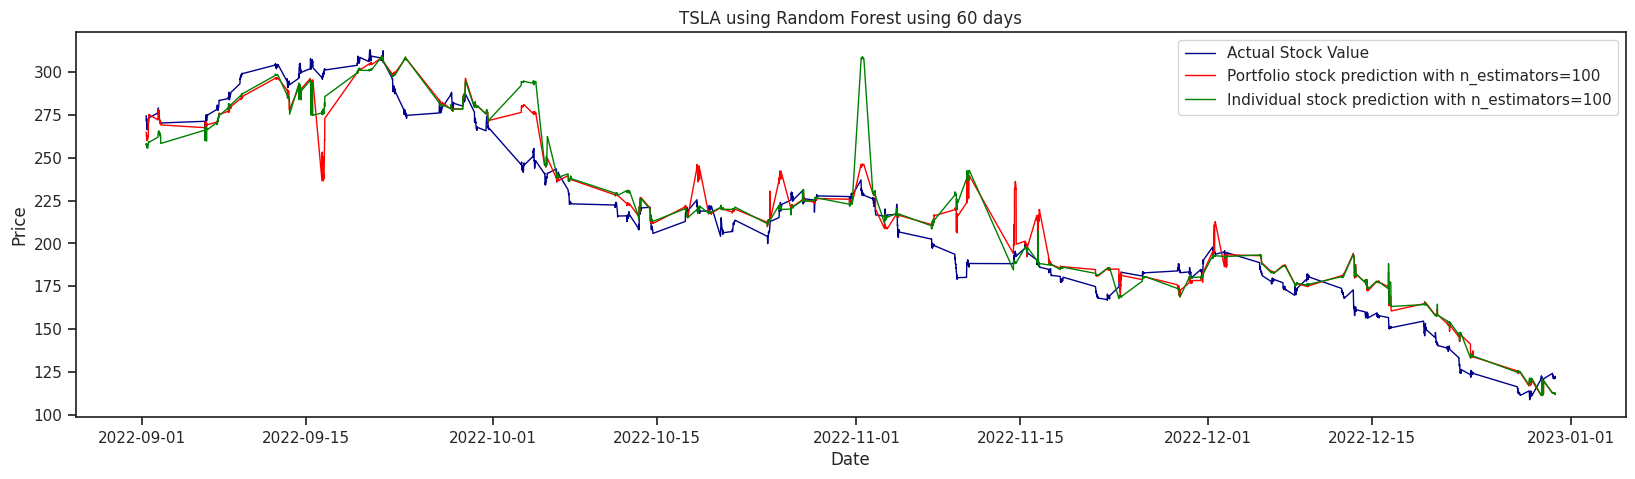

In [ ]:
plt.figure(figsize=(20,5))
sns.set(style='ticks')
linewidth=1
sns.lineplot(data=TSLA_60_100,x='DATETIME',y='ACTUAL',label='Actual Stock Value',linewidth=linewidth, color='darkblue')
sns.lineplot(data=TSLA_60_100,x='DATETIME',y='PREDICTED_Portfolio',label='Portfolio stock prediction with n_estimators=100',linewidth=linewidth,color='red') # Although the 300 model showed slightly better results in terms of MAPE and MPE metrics, the 100 model was chosen due to its lower MTT.
sns.lineplot(data=TSLA_60_100,x='DATETIME',y='PREDICTED_stock',label='Individual stock prediction with n_estimators=100',linewidth=linewidth,color='green')  #Although the 300 model showed slightly better results in terms of MAPE and MPE metrics, the 100 model was chosen due to its lower MTT.
#sns.lineplot(data=TSLA_60_300,x='DATETIME',y='PREDICTED_Portfolio',label='Portfolio300',linewidth=linewidth)
#sns.lineplot(data=TSLA_60_300,x='DATETIME',y='PREDICTED_stock',label='Individual300',linewidth=linewidth)
plt.title('TSLA using Random Forest using 60 days')
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()

## WMT


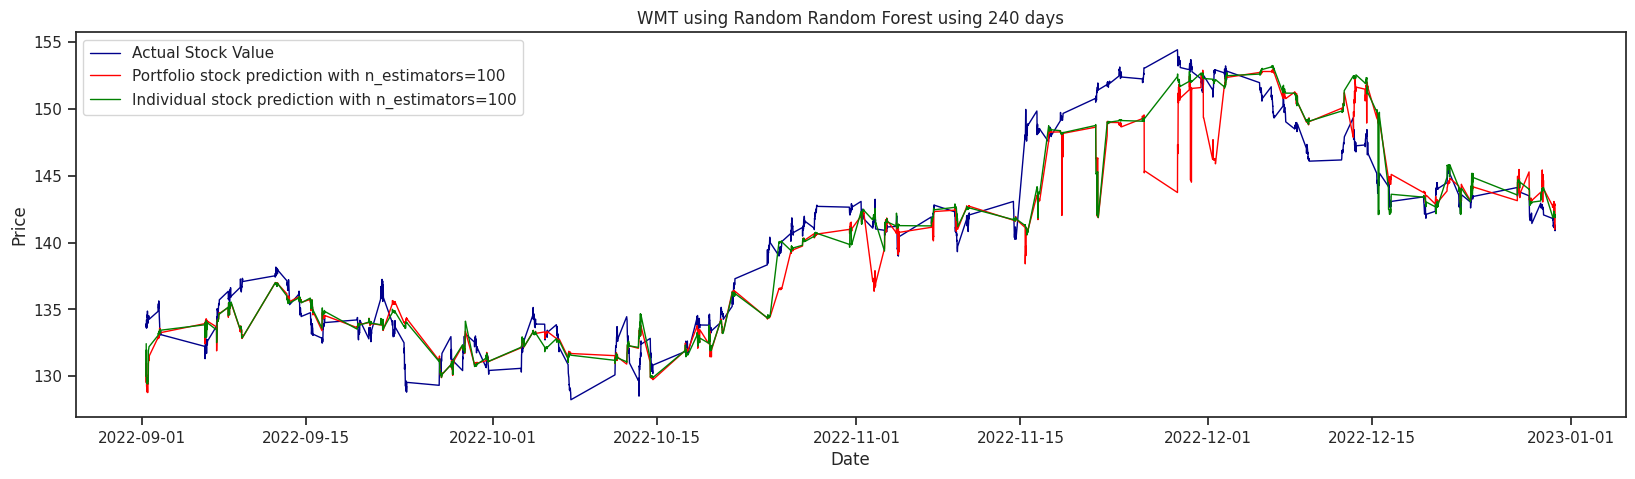

In [ ]:
plt.figure(figsize=(20,5))
sns.set(style='ticks')
linewidth=1
sns.lineplot(data=WMT_240_100,x='DATETIME',y='ACTUAL',label='Actual Stock Value',linewidth=linewidth, color='darkblue')
sns.lineplot(data=WMT_240_100,x='DATETIME',y='PREDICTED_Portfolio',label='Portfolio stock prediction with n_estimators=100',linewidth=linewidth,color='red') # Although the 300 model showed slightly better results in terms oWMT MAPE and MPE metrics, the 100 model was chosen due to its lower MTT.
sns.lineplot(data=WMT_240_100,x='DATETIME',y='PREDICTED_stock',label='Individual stock prediction with n_estimators=100',linewidth=linewidth,color='green')  #Although the 300 model showed slightly better results in terms oWMT MAPE and MPE metrics, the 100 model was chosen due to its lower MTT.
#sns.lineplot(data=WMT_240_300,x='DATETIME',y='PREDICTED_PortWMTolio',label='PortWMTolio300',linewidth=linewidth)
#sns.lineplot(data=WMT_240_300,x='DATETIME',y='PREDICTED_stock',label='Individual300',linewidth=linewidth)
plt.title('WMT using Random Random Forest using 240 days')
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()

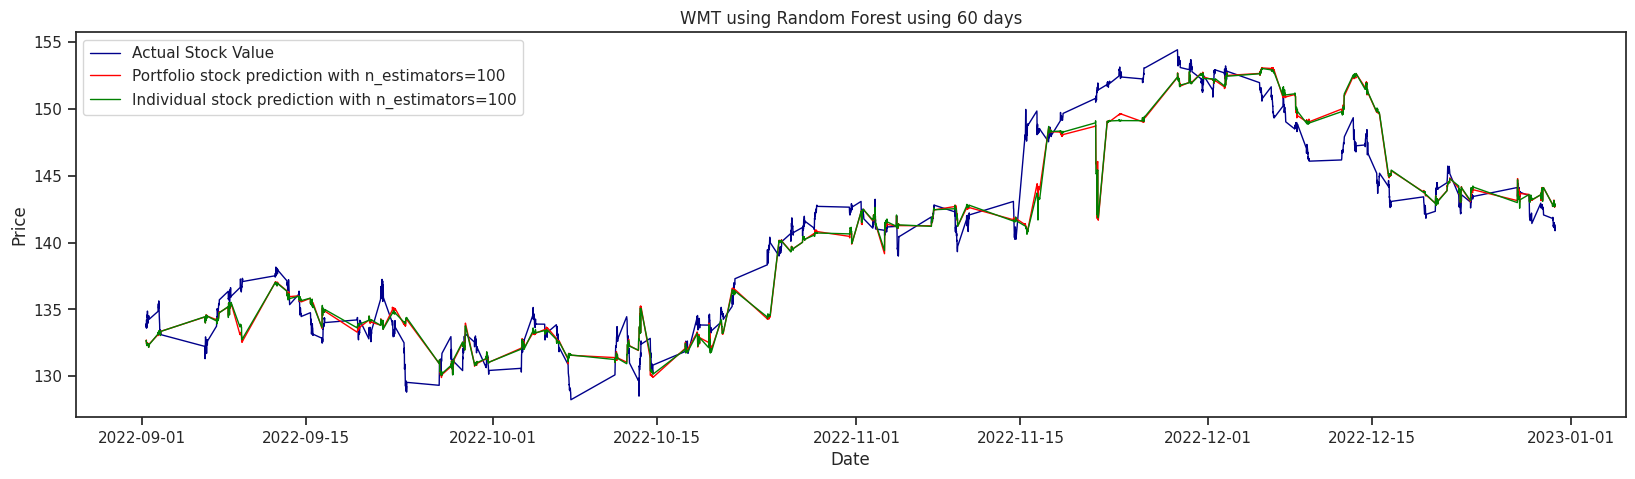

In [ ]:
plt.figure(figsize=(20,5))
sns.set(style='ticks')
linewidth=1
sns.lineplot(data=WMT_60_100,x='DATETIME',y='ACTUAL',label='Actual Stock Value',linewidth=linewidth, color='darkblue')
sns.lineplot(data=WMT_60_100,x='DATETIME',y='PREDICTED_Portfolio',label='Portfolio stock prediction with n_estimators=100',linewidth=linewidth,color='red') # Although the 300 model showed slightly better results in terms of MAPE and MPE metrics, the 100 model was chosen due to its lower MTT.
sns.lineplot(data=WMT_60_100,x='DATETIME',y='PREDICTED_stock',label='Individual stock prediction with n_estimators=100',linewidth=linewidth,color='green')  #Although the 300 model showed slightly better results in terms of MAPE and MPE metrics, the 100 model was chosen due to its lower MTT.
#sns.lineplot(data=WMT_60_300,x='DATETIME',y='PREDICTED_Portfolio',label='Portfolio300',linewidth=linewidth)
#sns.lineplot(data=WMT_60_300,x='DATETIME',y='PREDICTED_stock',label='Individual300',linewidth=linewidth)
plt.title('WMT using Random Forest using 60 days')
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()

# MLP

In [ ]:
#MLP: Portfolio
P_MLP240_NA=pd.read_excel('MLP/Portafolio/MLP240.xlsx')
P_MLP240_8=pd.read_excel('MLP/Portafolio/MLP240_epoch8_.xlsx')
P_MLP240_20=pd.read_excel('MLP/Portafolio/MLP240_epoch20_.xlsx')
P_MLP60_NA=pd.read_excel('MLP/Portafolio/MLP60.xlsx')
P_MLP60_8=pd.read_excel('MLP/Portafolio/MLP60_epoch8_.xlsx')
P_MLP60_20=pd.read_excel('MLP/Portafolio/MLP60_epoch20_.xlsx')

In [ ]:
# For MLP and XGBoost this step is necessary since the portfolio includes the PLRT variable in the results for stock and shifts the data incorrectly , If time is avaible we will fix this from the csv and the code but for the mean time this has proven to fix the problem for graphing purposes
# Define replacement dictionary

replacement_dict = {
    'PLT': 'T',
    'T': 'TSLA',
    'VZ': 'WMT',
    'WMT':'XMO',
}

In [ ]:
# Specify the column you want to replace
column_to_replace = 'stock_Id'

# 240
P_MLP240_NA[column_to_replace] = P_MLP240_NA[column_to_replace].replace(replacement_dict)
P_MLP240_8[column_to_replace] = P_MLP240_8[column_to_replace].replace(replacement_dict)
P_MLP240_20[column_to_replace] = P_MLP240_20[column_to_replace].replace(replacement_dict)

#60

P_MLP60_NA[column_to_replace] = P_MLP60_NA[column_to_replace].replace(replacement_dict)
P_MLP60_8[column_to_replace] = P_MLP60_8[column_to_replace].replace(replacement_dict)
P_MLP60_20[column_to_replace] = P_MLP60_20[column_to_replace].replace(replacement_dict)


In [ ]:
# AAPL
#240
AAPL_MLP240_NA = pd.read_excel('MLP/Individual stocks/finalmlp/MLP240_APPL.xlsx')
AAPL_MLP240_8 = pd.read_excel('MLP/Individual stocks/finalmlp/MLP240_APPL_epoch8.xlsx')
AAPL_MLP240_20 = pd.read_excel('MLP/Individual stocks/finalmlp/MLP240_APPL_epoch20.xlsx')
#60
AAPL_MLP60_NA = pd.read_excel('MLP/Individual stocks/finalmlp/MLP60_APPL.xlsx')
AAPL_MLP60_8 = pd.read_excel('MLP/Individual stocks/finalmlp/MLP60_AAPL_epoch8.xlsx')
AAPL_MLP60_20 = pd.read_excel('MLP/Individual stocks/finalmlp/MLP60_APPL_epoch20.xlsx')


In [ ]:
# TSLA
#240
TSLA_MLP240_NA= pd.read_excel('MLP/Individual stocks/finalmlp/MLP240_TSLA.xlsx')
TSLA_MLP240_8 = pd.read_excel('MLP/Individual stocks/finalmlp/MLP240_TSLA_epoch8.xlsx')
TSLA_MLP240_20 = pd.read_excel('MLP/Individual stocks/finalmlp/MLP240_TSLA_epoch20.xlsx')
#60
TSLA_MLP60_NA = pd.read_excel('MLP/Individual stocks/finalmlp/MLP60_TSLA.xlsx')
TSLA_MLP60_8 = pd.read_excel('MLP/Individual stocks/finalmlp/MLP60_TSLA_epoch8.xlsx')
TSLA_MLP60_20 = pd.read_excel('MLP/Individual stocks/finalmlp/MLP60_TSLA_epoch20.xlsx')


In [ ]:
# F
# 240
F_MLP240_NA = pd.read_excel('MLP/Individual stocks/finalmlp/MLP240_F.xlsx')
F_MLP240_8 = pd.read_excel('MLP/Individual stocks/finalmlp/MLP240_F_epoch8.xlsx')
F_MLP240_20 = pd.read_excel('MLP/Individual stocks/finalmlp/MLP240_F_epoch20.xlsx')

# 60
F_MLP60_NA = pd.read_excel('MLP/Individual stocks/finalmlp/MLP60_F.xlsx')
F_MLP60_8 = pd.read_excel('MLP/Individual stocks/finalmlp/MLP60_F_epoch8.xlsx')
F_MLP60_20 = pd.read_excel('MLP/Individual stocks/finalmlp/MLP60_F_epoch20.xlsx')


In [ ]:
# WMT
# 240
WMT_MLP240_NA = pd.read_excel('MLP/Individual stocks/finalmlp/MLP240_WMT.xlsx')
WMT_MLP240_8 = pd.read_excel('MLP/Individual stocks/finalmlp/MLP240_WMT_epoch8.xlsx')
WMT_MLP240_20 = pd.read_excel('MLP/Individual stocks/finalmlp/MLP240_WMT_epoch20.xlsx')

# 60
WMT_MLP60_NA = pd.read_excel('MLP/Individual stocks/finalmlp/MLP60_WMT.xlsx')
WMT_MLP60_8 = pd.read_excel('MLP/Individual stocks/finalmlp/MLP60_WMT_epoch8.xlsx')
WMT_MLP60_20 = pd.read_excel('MLP/Individual stocks/finalmlp/MLP60_WMT_epoch20.xlsx')



In [ ]:
# In some cases if the file would not recognize the date and would identify it as an object , this ensures its formated as a date and the merge can be succesful
#240_NA
AAPL_MLP240_NA['DATETIME']=pd.to_datetime(AAPL_MLP240_NA['DATETIME'])
TSLA_MLP240_NA['DATETIME']=pd.to_datetime(TSLA_MLP240_NA['DATETIME'])
F_MLP240_NA['DATETIME']=pd.to_datetime(F_MLP240_NA['DATETIME'])
WMT_MLP240_NA['DATETIME']=pd.to_datetime(WMT_MLP240_NA['DATETIME'])
#240_8
AAPL_MLP240_8['DATETIME']=pd.to_datetime(AAPL_MLP240_8['DATETIME'])
TSLA_MLP240_8['DATETIME']=pd.to_datetime(TSLA_MLP240_8['DATETIME'])
F_MLP240_8['DATETIME']=pd.to_datetime(F_MLP240_8['DATETIME'])
WMT_MLP240_8['DATETIME']=pd.to_datetime(WMT_MLP240_8['DATETIME'])

#240_20
AAPL_MLP240_20['DATETIME']=pd.to_datetime(AAPL_MLP240_20['DATETIME'])
TSLA_MLP240_20['DATETIME']=pd.to_datetime(TSLA_MLP240_20['DATETIME'])
F_MLP240_20['DATETIME']=pd.to_datetime(F_MLP240_20['DATETIME'])
WMT_MLP240_20['DATETIME']=pd.to_datetime(WMT_MLP240_20['DATETIME'])

#60_NA
AAPL_MLP60_NA['DATETIME']=pd.to_datetime(AAPL_MLP60_NA['DATETIME'])
TSLA_MLP60_NA['DATETIME']=pd.to_datetime(TSLA_MLP60_NA['DATETIME'])
F_MLP60_NA['DATETIME']=pd.to_datetime(F_MLP60_NA['DATETIME'])
WMT_MLP60_NA['DATETIME']=pd.to_datetime(WMT_MLP60_NA['DATETIME'])
#60_8

AAPL_MLP60_8['DATETIME']=pd.to_datetime(AAPL_MLP60_8['DATETIME'])
TSLA_MLP60_8['DATETIME']=pd.to_datetime(TSLA_MLP60_8['DATETIME'])
F_MLP60_8['DATETIME']=pd.to_datetime(F_MLP60_8['DATETIME'])
WMT_MLP60_8['DATETIME']=pd.to_datetime(WMT_MLP60_8['DATETIME'])

#60_20
AAPL_MLP60_20['DATETIME']=pd.to_datetime(AAPL_MLP60_20['DATETIME'])
TSLA_MLP60_20['DATETIME']=pd.to_datetime(TSLA_MLP60_20['DATETIME'])
F_MLP60_20['DATETIME']=pd.to_datetime(F_MLP60_20['DATETIME'])
WMT_MLP60_20['DATETIME']=pd.to_datetime(WMT_MLP60_20['DATETIME'])

In [ ]:
# In this section we merge the predictions of the actual values with the predictions from the individual stock and prediction using the portfolio

# 240-NA P_MLP240_NA
stock='AAPL'
AAPL_240_NA=pd.merge(left=P_MLP240_NA[P_MLP240_NA['stock_Id']==stock],right=AAPL_MLP240_NA,on=['DATETIME','ACTUAL'],how='inner',suffixes=['_Portfolio','_stock'])[['stock_Id','DATETIME','ACTUAL','PREDICTED_Portfolio','PREDICTED_stock']]
stock='TSLA'
TSLA_240_NA=pd.merge(left=P_MLP240_NA[P_MLP240_NA['stock_Id']==stock],right=TSLA_MLP240_NA,on=['DATETIME','ACTUAL'],how='inner',suffixes=['_Portfolio','_stock'])[['stock_Id','DATETIME','ACTUAL','PREDICTED_Portfolio','PREDICTED_stock']]
stock='F'
F_240_NA=pd.merge(left=P_MLP240_NA[P_MLP240_NA['stock_Id']==stock],right=F_MLP240_NA,on=['DATETIME','ACTUAL'],how='inner',suffixes=['_Portfolio','_stock'])[['stock_Id','DATETIME','ACTUAL','PREDICTED_Portfolio','PREDICTED_stock']]
stock='WMT'
WMT_240_NA=pd.merge(left=P_MLP240_NA[P_MLP240_NA['stock_Id']==stock],right=WMT_MLP240_NA,on=['DATETIME','ACTUAL'],how='inner',suffixes=['_Portfolio','_stock'])[['stock_Id','DATETIME','ACTUAL','PREDICTED_Portfolio','PREDICTED_stock']]

In [ ]:

# 240-8
stock='AAPL'
AAPL_240_8=pd.merge(left=P_MLP240_8[P_MLP240_8['stock_Id']==stock],right=AAPL_MLP240_8,on=['DATETIME','ACTUAL'],how='inner',suffixes=['_Portfolio','_stock'])[['stock_Id','DATETIME','ACTUAL','PREDICTED_Portfolio','PREDICTED_stock']]
stock='TSLA'
TSLA_240_8=pd.merge(left=P_MLP240_8[P_MLP240_8['stock_Id']==stock],right=TSLA_MLP240_8,on=['DATETIME','ACTUAL'],how='inner',suffixes=['_Portfolio','_stock'])[['stock_Id','DATETIME','ACTUAL','PREDICTED_Portfolio','PREDICTED_stock']]
stock='F'
F_240_8=pd.merge(left=P_MLP240_8[P_MLP240_8['stock_Id']==stock],right=F_MLP240_8,on=['DATETIME','ACTUAL'],how='inner',suffixes=['_Portfolio','_stock'])[['stock_Id','DATETIME','ACTUAL','PREDICTED_Portfolio','PREDICTED_stock']]
stock='WMT'
WMT_240_8=pd.merge(left=P_MLP240_8[P_MLP240_8['stock_Id']==stock],right=WMT_MLP240_8,on=['DATETIME','ACTUAL'],how='inner',suffixes=['_Portfolio','_stock'])[['stock_Id','DATETIME','ACTUAL','PREDICTED_Portfolio','PREDICTED_stock']]
# 240-20
stock='AAPL'
AAPL_240_20=pd.merge(left=P_MLP240_20[P_MLP240_20['stock_Id']==stock],right=AAPL_MLP240_20,on=['DATETIME','ACTUAL'],how='inner',suffixes=['_Portfolio','_stock'])[['stock_Id','DATETIME','ACTUAL','PREDICTED_Portfolio','PREDICTED_stock']]
stock='TSLA'
TSLA_240_20=pd.merge(left=P_MLP240_20[P_MLP240_20['stock_Id']==stock],right=TSLA_MLP240_20,on=['DATETIME','ACTUAL'],how='inner',suffixes=['_Portfolio','_stock'])[['stock_Id','DATETIME','ACTUAL','PREDICTED_Portfolio','PREDICTED_stock']]
stock='F'
F_240_20=pd.merge(left=P_MLP240_20[P_MLP240_20['stock_Id']==stock],right=F_MLP240_20,on=['DATETIME','ACTUAL'],how='inner',suffixes=['_Portfolio','_stock'])[['stock_Id','DATETIME','ACTUAL','PREDICTED_Portfolio','PREDICTED_stock']]
stock='WMT'
WMT_240_20=pd.merge(left=P_MLP240_20[P_MLP240_20['stock_Id']==stock],right=WMT_MLP240_20,on=['DATETIME','ACTUAL'],how='inner',suffixes=['_Portfolio','_stock'])[['stock_Id','DATETIME','ACTUAL','PREDICTED_Portfolio','PREDICTED_stock']]
# 60-NA
stock='AAPL'
AAPL_60_NA=pd.merge(left=P_MLP60_NA[P_MLP60_NA['stock_Id']==stock],right=AAPL_MLP60_NA,on=['DATETIME','ACTUAL'],how='inner',suffixes=['_Portfolio','_stock'])[['stock_Id','DATETIME','ACTUAL','PREDICTED_Portfolio','PREDICTED_stock']]
stock='TSLA'
TSLA_60_NA=pd.merge(left=P_MLP60_NA[P_MLP60_NA['stock_Id']==stock],right=TSLA_MLP60_NA,on=['DATETIME','ACTUAL'],how='inner',suffixes=['_Portfolio','_stock'])[['stock_Id','DATETIME','ACTUAL','PREDICTED_Portfolio','PREDICTED_stock']]
stock='F'
F_60_NA=pd.merge(left=P_MLP60_NA[P_MLP60_NA['stock_Id']==stock],right=F_MLP60_NA,on=['DATETIME','ACTUAL'],how='inner',suffixes=['_Portfolio','_stock'])[['stock_Id','DATETIME','ACTUAL','PREDICTED_Portfolio','PREDICTED_stock']]
stock='WMT'
WMT_60_NA=pd.merge(left=P_MLP60_NA[P_MLP60_NA['stock_Id']==stock],right=WMT_MLP60_NA,on=['DATETIME','ACTUAL'],how='inner',suffixes=['_Portfolio','_stock'])[['stock_Id','DATETIME','ACTUAL','PREDICTED_Portfolio','PREDICTED_stock']]
# 60-8
stock='AAPL'
AAPL_60_8=pd.merge(left=P_MLP60_8[P_MLP60_8['stock_Id']==stock],right=AAPL_MLP60_8,on=['DATETIME','ACTUAL'],how='inner',suffixes=['_Portfolio','_stock'])[['stock_Id','DATETIME','ACTUAL','PREDICTED_Portfolio','PREDICTED_stock']]
stock='TSLA'
TSLA_60_8=pd.merge(left=P_MLP60_8[P_MLP60_8['stock_Id']==stock],right=TSLA_MLP60_8,on=['DATETIME','ACTUAL'],how='inner',suffixes=['_Portfolio','_stock'])[['stock_Id','DATETIME','ACTUAL','PREDICTED_Portfolio','PREDICTED_stock']]
stock='F'
F_60_8=pd.merge(left=P_MLP60_8[P_MLP60_8['stock_Id']==stock],right=F_MLP60_8,on=['DATETIME','ACTUAL'],how='inner',suffixes=['_Portfolio','_stock'])[['stock_Id','DATETIME','ACTUAL','PREDICTED_Portfolio','PREDICTED_stock']]
stock='WMT'
WMT_60_8=pd.merge(left=P_MLP60_8[P_MLP60_8['stock_Id']==stock],right=WMT_MLP60_8,on=['DATETIME','ACTUAL'],how='inner',suffixes=['_Portfolio','_stock'])[['stock_Id','DATETIME','ACTUAL','PREDICTED_Portfolio','PREDICTED_stock']]
# 60-20
stock='AAPL'
AAPL_60_20=pd.merge(left=P_MLP60_20[P_MLP60_20['stock_Id']==stock],right=AAPL_MLP60_20,on=['DATETIME','ACTUAL'],how='inner',suffixes=['_Portfolio','_stock'])[['stock_Id','DATETIME','ACTUAL','PREDICTED_Portfolio','PREDICTED_stock']]
stock='TSLA'
TSLA_60_20=pd.merge(left=P_MLP60_20[P_MLP60_20['stock_Id']==stock],right=TSLA_MLP60_20,on=['DATETIME','ACTUAL'],how='inner',suffixes=['_Portfolio','_stock'])[['stock_Id','DATETIME','ACTUAL','PREDICTED_Portfolio','PREDICTED_stock']]
stock='F'
F_60_20=pd.merge(left=P_MLP60_20[P_MLP60_20['stock_Id']==stock],right=F_MLP60_20,on=['DATETIME','ACTUAL'],how='inner',suffixes=['_Portfolio','_stock'])[['stock_Id','DATETIME','ACTUAL','PREDICTED_Portfolio','PREDICTED_stock']]
stock='WMT'
WMT_60_20=pd.merge(left=P_MLP60_20[P_MLP60_20['stock_Id']==stock],right=WMT_MLP60_20,on=['DATETIME','ACTUAL'],how='inner',suffixes=['_Portfolio','_stock'])[['stock_Id','DATETIME','ACTUAL','PREDICTED_Portfolio','PREDICTED_stock']]

##AAPL

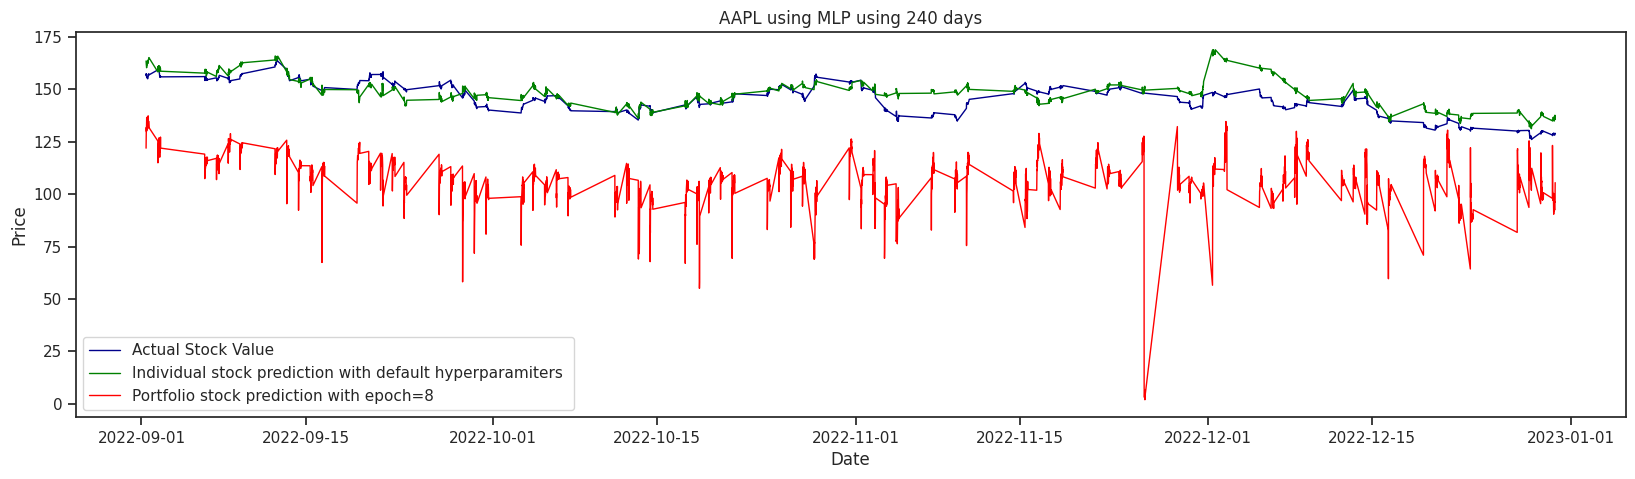

In [ ]:
plt.figure(figsize=(20,5))
sns.set(style='ticks')
linewidth=1
sns.lineplot(data=AAPL_240_NA,x='DATETIME',y='ACTUAL',label='Actual Stock Value',linewidth=linewidth, color='darkblue')
#sns.lineplot(data=AAPL_240_NA,x='DATETIME',y='PREDICTED_Portfolio',label='Portfolio stock prediction with deafult hyperparameters',linewidth=linewidth,color='red') #
sns.lineplot(data=AAPL_240_NA,x='DATETIME',y='PREDICTED_stock',label='Individual stock prediction with default hyperparamiters ',linewidth=linewidth,color='green')
sns.lineplot(data=AAPL_240_8,x='DATETIME',y='PREDICTED_Portfolio',label='Portfolio stock prediction with epoch=8',linewidth=linewidth,color='red')# MPE with defualt hyperparamiters is slightly better but epoch 8 was choosen due to MTT
#sns.lineplot(data=AAPL_240_8,x='DATETIME',y='PREDICTED_stock',label='Individual with epoch=8',linewidth=linewidth)
#sns.lineplot(data=AAPL_240_20,x='DATETIME',y='PREDICTED_Portfolio',label='Portfolio with epoch=20',linewidth=linewidth)
#sns.lineplot(data=AAPL_240_20,x='DATETIME',y='PREDICTED_stock',label='Individualwith epoch=20',linewidth=linewidth)
plt.title('AAPL using MLP using 240 days')
plt.ylabel('Price')
plt.xlabel('Date')

plt.show()

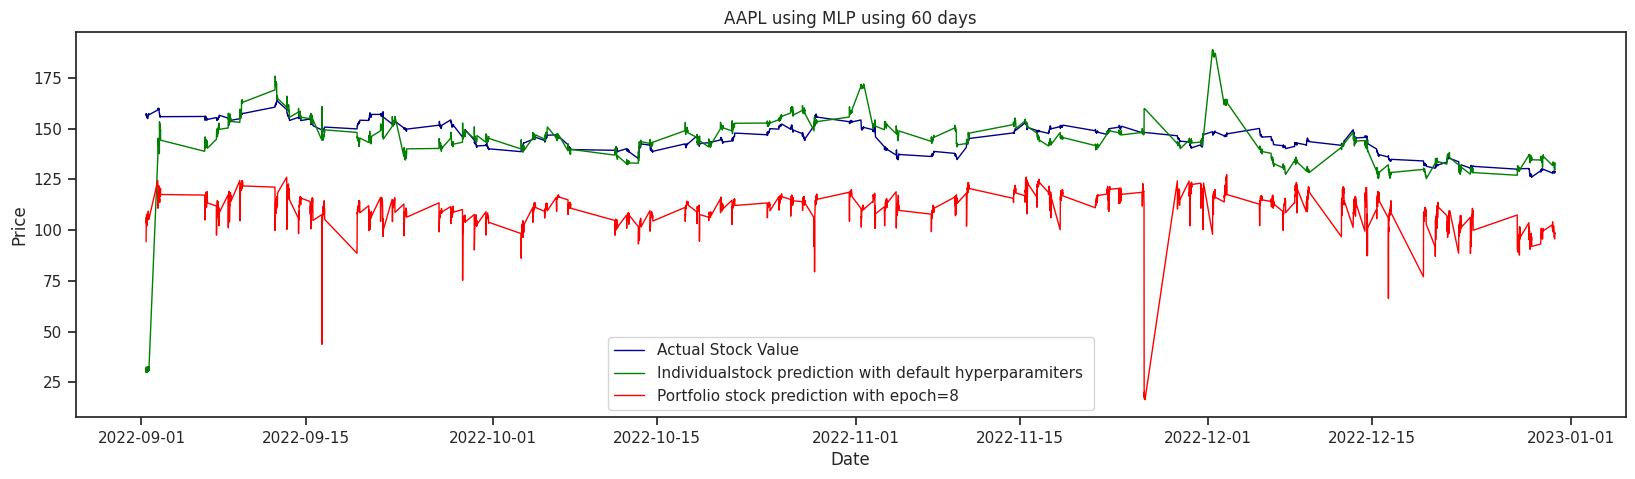

In [ ]:
plt.figure(figsize=(20,5))
sns.set(style='ticks')
linewidth=1
sns.lineplot(data=AAPL_60_NA,x='DATETIME',y='ACTUAL',label='Actual Stock Value',linewidth=linewidth, color='darkblue')
#sns.lineplot(data=AAPL_60_NA,x='DATETIME',y='PREDICTED_Portfolio',label='Portfolio',linewidth=linewidth,color='red')
sns.lineplot(data=AAPL_60_NA,x='DATETIME',y='PREDICTED_stock',label='Individualstock prediction with default hyperparamiters ',linewidth=linewidth,color='green')
sns.lineplot(data=AAPL_60_8,x='DATETIME',y='PREDICTED_Portfolio',label='Portfolio stock prediction with epoch=8',linewidth=linewidth,color='red')# MPE of 60_NA is slightly better but epoch 8 was choosen due to MTT
#sns.lineplot(data=AAPL_60_8,x='DATETIME',y='PREDICTED_stock',label='Individual with epoch=8',linewidth=linewidth)
#sns.lineplot(data=AAPL_60_20,x='DATETIME',y='PREDICTED_Portfolio',label='Portfolio with epoch=20',linewidth=linewidth)
#sns.lineplot(data=AAPL_60_20,x='DATETIME',y='PREDICTED_stock',label='Individualwith epoch=20',linewidth=linewidth)
plt.title('AAPL using MLP using 60 days')
plt.ylabel('Price')
plt.xlabel('Date')

plt.show()

## F

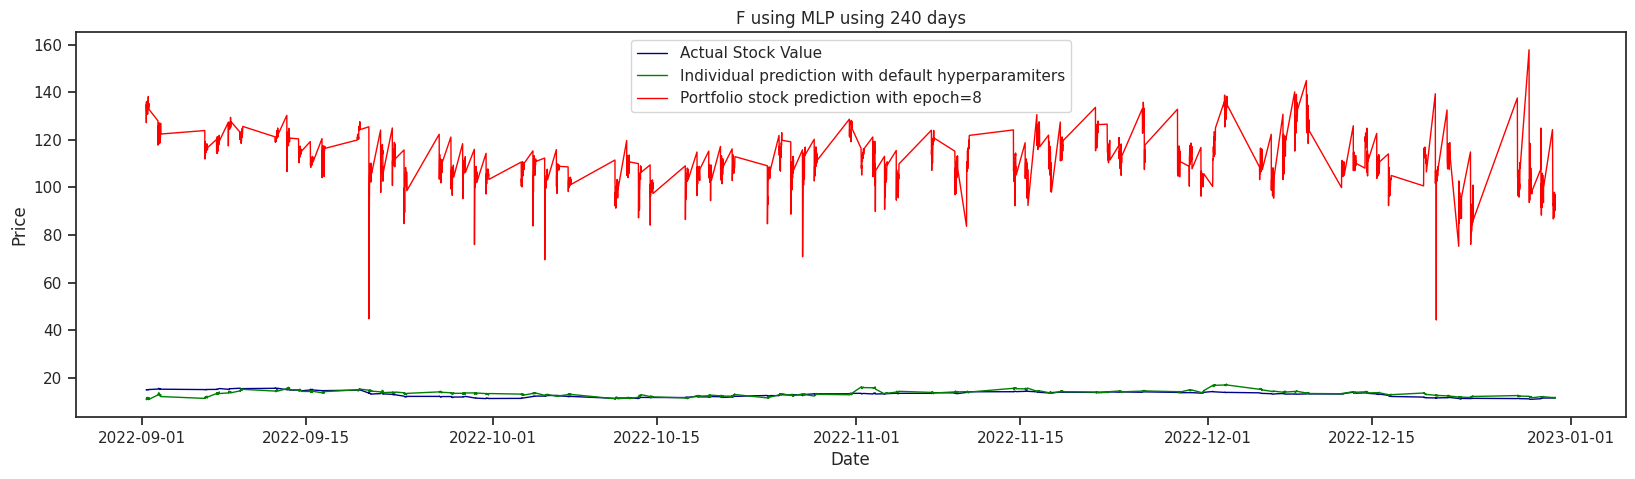

In [ ]:
plt.figure(figsize=(20,5))
sns.set(style='ticks')
linewidth=1
sns.lineplot(data=F_240_NA,x='DATETIME',y='ACTUAL',label='Actual Stock Value',linewidth=linewidth, color='darkblue')
#sns.lineplot(data=F_240_NA,x='DATETIME',y='PREDICTED_Portfolio',label='Portfolio',linewidth=linewidth,color='red')
sns.lineplot(data=F_240_NA,x='DATETIME',y='PREDICTED_stock',label='Individual prediction with default hyperparamiters',linewidth=linewidth,color='green')
sns.lineplot(data=F_240_8,x='DATETIME',y='PREDICTED_Portfolio',label='Portfolio stock prediction with epoch=8',linewidth=linewidth,color='red')# MPE of 240_NA is slightly better but epoch 8 was choosen due to MTT
#sns.lineplot(data=F_240_8,x='DATETIME',y='PREDICTED_stock',label='Individual with epoch=8',linewidth=linewidth)
#sns.lineplot(data=F_240_20,x='DATETIME',y='PREDICTED_Portfolio',label='Portfolio with epoch=20',linewidth=linewidth)
#sns.lineplot(data=F_240_20,x='DATETIME',y='PREDICTED_stock',label='Individualwith epoch=20',linewidth=linewidth)
plt.title('F using MLP using 240 days')
plt.ylabel('Price')
plt.xlabel('Date')

plt.show()

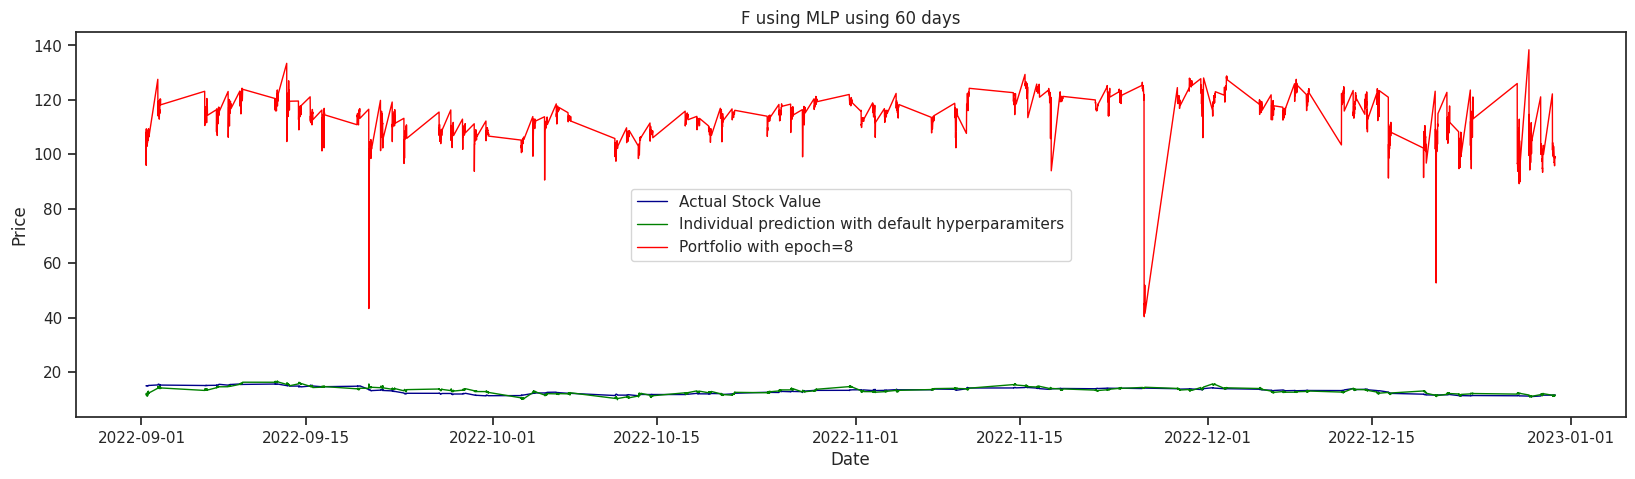

In [ ]:
plt.figure(figsize=(20,5))
sns.set(style='ticks')
linewidth=1
sns.lineplot(data=F_60_NA,x='DATETIME',y='ACTUAL',label='Actual Stock Value',linewidth=linewidth, color='darkblue')
#sns.lineplot(data=F_60_NA,x='DATETIME',y='PREDICTED_Portfolio',label='Portfolio',linewidth=linewidth,color='red')
sns.lineplot(data=F_60_NA,x='DATETIME',y='PREDICTED_stock',label='Individual prediction with default hyperparamiters',linewidth=linewidth,color='green')
sns.lineplot(data=F_60_8,x='DATETIME',y='PREDICTED_Portfolio',label='Portfolio with epoch=8',linewidth=linewidth,color='red')# MPE of 60_NA is slightly better but epoch 8 was choosen due to MTT
#sns.lineplot(data=F_60_8,x='DATETIME',y='PREDICTED_stock',label='Individual with epoch=8',linewidth=linewidth)
#sns.lineplot(data=F_60_20,x='DATETIME',y='PREDICTED_Portfolio',label='Portfolio with epoch=20',linewidth=linewidth)
#sns.lineplot(data=F_60_20,x='DATETIME',y='PREDICTED_stock',label='Individualwith epoch=20',linewidth=linewidth)
plt.title('F using MLP using 60 days')
plt.ylabel('Price')
plt.xlabel('Date')

plt.show()

##TSLA

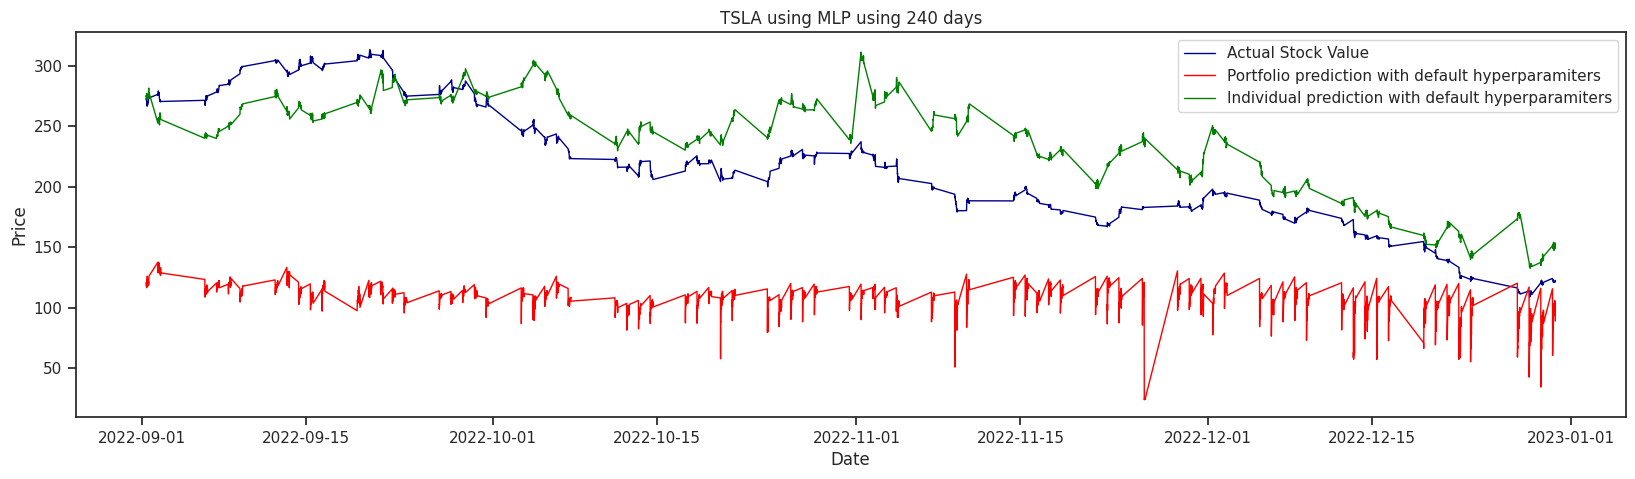

In [ ]:
plt.figure(figsize=(20,5))
sns.set(style='ticks')
linewidth=1
sns.lineplot(data=TSLA_240_NA,x='DATETIME',y='ACTUAL',label='Actual Stock Value',linewidth=linewidth, color='darkblue')
sns.lineplot(data=TSLA_240_NA,x='DATETIME',y='PREDICTED_Portfolio',label='Portfolio prediction with default hyperparamiters',linewidth=linewidth,color='red')
sns.lineplot(data=TSLA_240_NA,x='DATETIME',y='PREDICTED_stock',label='Individual prediction with default hyperparamiters',linewidth=linewidth,color='green')
#sns.lineplot(data=TSLA_240_8,x='DATETIME',y='PREDICTED_Portfolio',label='Portfolio with epoch=8',linewidth=linewidth)
#sns.lineplot(data=TSLA_240_8,x='DATETIME',y='PREDICTED_stock',label='Individual with epoch=8',linewidth=linewidth)
#sns.lineplot(data=TSLA_240_20,x='DATETIME',y='PREDICTED_Portfolio',label='Portfolio with epoch=20',linewidth=linewidth)
#sns.lineplot(data=TSLA_240_20,x='DATETIME',y='PREDICTED_stock',label='Individualwith epoch=20',linewidth=linewidth)
plt.title('TSLA using MLP using 240 days')
plt.ylabel('Price')
plt.xlabel('Date')

plt.show()

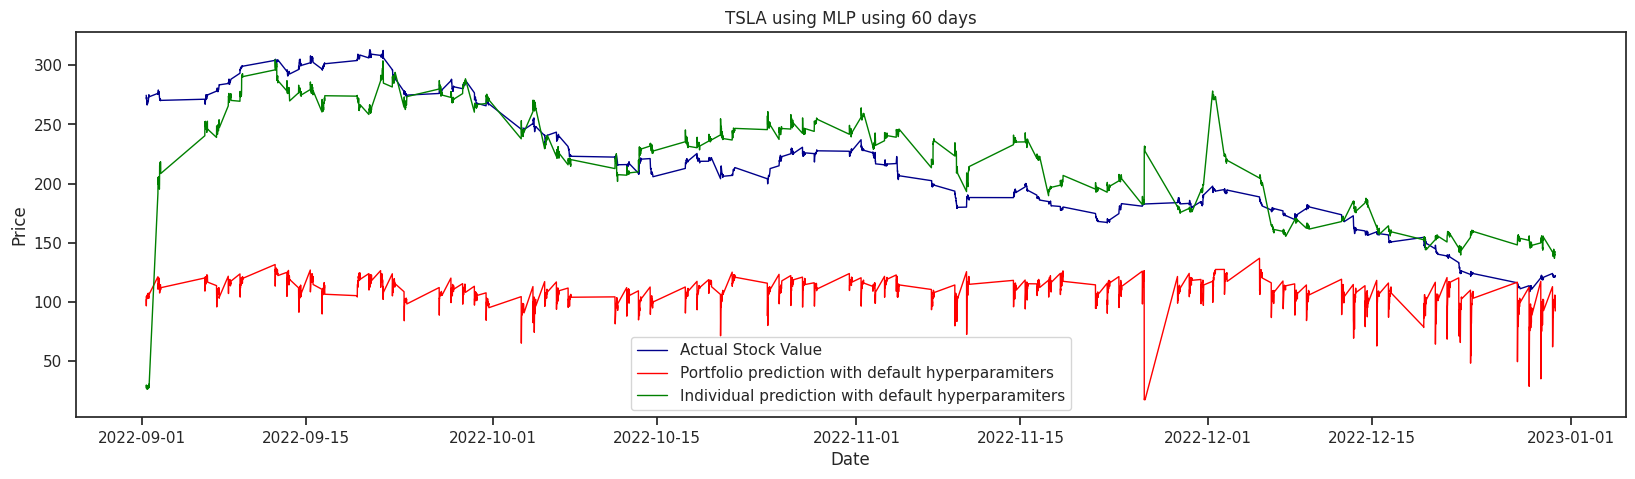

In [ ]:
plt.figure(figsize=(20,5))
sns.set(style='ticks')
linewidth=1
sns.lineplot(data=TSLA_60_NA,x='DATETIME',y='ACTUAL',label='Actual Stock Value',linewidth=linewidth, color='darkblue')
sns.lineplot(data=TSLA_60_NA,x='DATETIME',y='PREDICTED_Portfolio',label='Portfolio prediction with default hyperparamiters',linewidth=linewidth,color='red')
sns.lineplot(data=TSLA_60_NA,x='DATETIME',y='PREDICTED_stock',label='Individual prediction with default hyperparamiters',linewidth=linewidth,color='green')
#sns.lineplot(data=TSLA_60_8,x='DATETIME',y='PREDICTED_Portfolio',label='Portfolio with epoch=8',linewidth=linewidth)
#sns.lineplot(data=TSLA_60_8,x='DATETIME',y='PREDICTED_stock',label='Individual with epoch=8',linewidth=linewidth)
#sns.lineplot(data=TSLA_60_20,x='DATETIME',y='PREDICTED_Portfolio',label='Portfolio with epoch=20',linewidth=linewidth)
#sns.lineplot(data=TSLA_60_20,x='DATETIME',y='PREDICTED_stock',label='Individualwith epoch=20',linewidth=linewidth)
plt.title('TSLA using MLP using 60 days')
plt.ylabel('Price')
plt.xlabel('Date')

plt.show()

##WMT

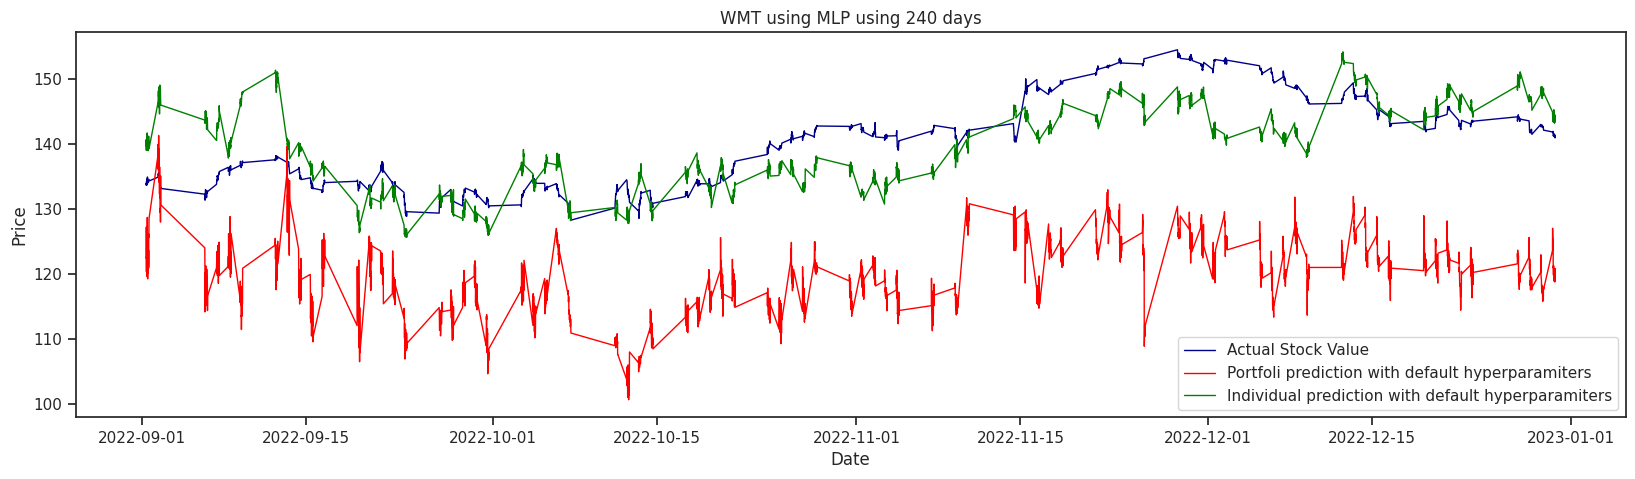

In [ ]:
plt.figure(figsize=(20,5))
sns.set(style='ticks')
linewidth=1
sns.lineplot(data=WMT_240_NA,x='DATETIME',y='ACTUAL',label='Actual Stock Value',linewidth=linewidth, color='darkblue')
sns.lineplot(data=WMT_240_NA,x='DATETIME',y='PREDICTED_Portfolio',label='Portfoli prediction with default hyperparamiters',linewidth=linewidth,color='red')
sns.lineplot(data=WMT_240_NA,x='DATETIME',y='PREDICTED_stock',label='Individual prediction with default hyperparamiters',linewidth=linewidth,color='green')
#sns.lineplot(data=WMT_240_8,x='DATETIME',y='PREDICTED_Portfolio',label='Portfolio with epoch=8',linewidth=linewidth)
#sns.lineplot(data=WMT_240_8,x='DATETIME',y='PREDICTED_stock',label='Individual with epoch=8',linewidth=linewidth)
#sns.lineplot(data=WMT_240_20,x='DATETIME',y='PREDICTED_Portfolio',label='Portfolio with epoch=20',linewidth=linewidth)
#sns.lineplot(data=WMT_240_20,x='DATETIME',y='PREDICTED_stock',label='Individualwith epoch=20',linewidth=linewidth)
plt.title('WMT using MLP using 240 days')
plt.ylabel('Price')
plt.xlabel('Date')

plt.show()

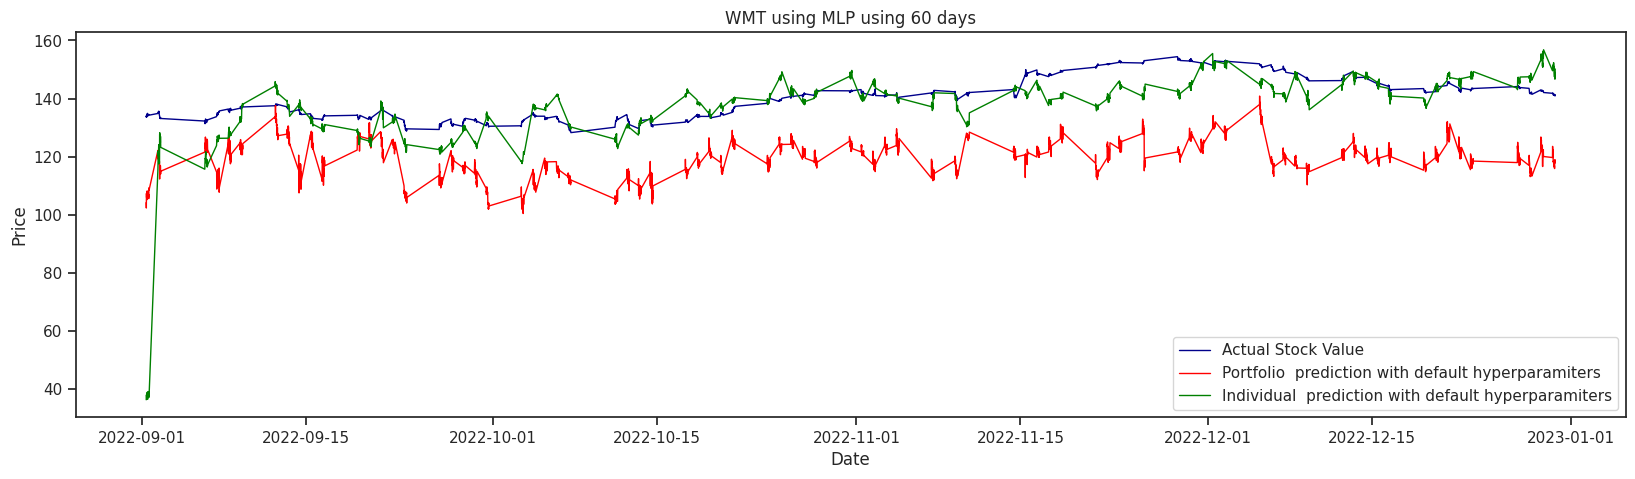

In [ ]:
plt.figure(figsize=(20,5))
sns.set(style='ticks')
linewidth=1
sns.lineplot(data=WMT_60_NA,x='DATETIME',y='ACTUAL',label='Actual Stock Value',linewidth=linewidth, color='darkblue')
sns.lineplot(data=WMT_60_NA,x='DATETIME',y='PREDICTED_Portfolio',label='Portfolio  prediction with default hyperparamiters',linewidth=linewidth,color='red')
sns.lineplot(data=WMT_60_NA,x='DATETIME',y='PREDICTED_stock',label='Individual  prediction with default hyperparamiters',linewidth=linewidth,color='green')
#sns.lineplot(data=WMT_60_8,x='DATETIME',y='PREDICTED_Portfolio',label='Portfolio with epoch=8',linewidth=linewidth)
#sns.lineplot(data=WMT_60_8,x='DATETIME',y='PREDICTED_stock',label='Individual with epoch=8',linewidth=linewidth)
#sns.lineplot(data=WMT_60_20,x='DATETIME',y='PREDICTED_Portfolio',label='Portfolio with epoch=20',linewidth=linewidth)
#sns.lineplot(data=WMT_60_20,x='DATETIME',y='PREDICTED_stock',label='Individualwith epoch=20',linewidth=linewidth)
plt.title('WMT using MLP using 60 days')
plt.ylabel('Price')
plt.xlabel('Date')

plt.show()

# XGBoost

In [3]:
#xgbooost: Portfolio
P_XGB240_100=pd.read_excel('XGBoost/Portafolio/XGB240_n_estimators100_max_depth_100.xlsx')
P_XGB240_300=pd.read_excel('XGBoost/Portafolio/XGB240_n_estimators300_max_depth_100.xlsx')
P_XGB60_100=pd.read_excel('XGBoost/Portafolio/XGB60_n_estimators100_max_depth_100.xlsx')
P_XGB60_300=pd.read_excel('XGBoost/Portafolio/XGB60_n_estimators300_max_depth_100.xlsx')


In [ ]:
#P_XGB240_100[P_XGB240_100.stock_Id=='WMT']

In [4]:
# For MLP and XGBoost this step is necessary since the portfolio includes the PLRT variable in the results for stock and shifts the data incorrectly , If time is avaible we will fix this from the csv and the code but for the mean time this has proven to fix the problem for graphing purposes
# Define replacement dictionary
replacement_dict = {
    'PLT': 'T',
    'T': 'TSLA',
    'VZ': 'WMT',
    'WMT':'XMO',
}

In [ ]:
#P_XGB240_100[P_XGB240_100.stock_Id=='WMT']

In [5]:
column_to_replace = 'stock_Id'

# 240
P_XGB240_100[column_to_replace] = P_XGB240_100[column_to_replace].replace(replacement_dict)
P_XGB240_300[column_to_replace] = P_XGB240_300[column_to_replace].replace(replacement_dict)

#60
P_XGB60_100[column_to_replace] = P_XGB60_100[column_to_replace].replace(replacement_dict)
P_XGB60_300[column_to_replace] = P_XGB60_300[column_to_replace].replace(replacement_dict)


In [6]:
#XGBoost: Stock
AAPL_XGB240_100=pd.read_excel('XGBoost/Individual stock/finalXGB/XGBoost240_APPL_n_estimators100_max_depth100.xlsx')
AAPL_XGB240_300=pd.read_excel('XGBoost/Individual stock/finalXGB/XGBoost240_APPL_n_estimators300_max_depth100.xlsx')
AAPL_XGB60_100=pd.read_excel('XGBoost/Individual stock/finalXGB/XGBoost60_APPL_n_estimators100_max_depth100.xlsx') #
AAPL_XGB60_300=pd.read_excel('XGBoost/Individual stock/finalXGB/XGBoost60_APPL_n_estimators300_max_depth100.xlsx')


In [7]:
TSLA_XGB240_100 = pd.read_excel('XGBoost/Individual stock/finalXGB/XGBoost240_TSLA_n_estimators100_max_depth100.xlsx')
TSLA_XGB240_300 = pd.read_excel('XGBoost/Individual stock/finalXGB/XGBoost240_TSLA_n_estimators300_max_depth100.xlsx')
TSLA_XGB60_100 = pd.read_excel('XGBoost/Individual stock/finalXGB/XGBoost60_TSLA_n_estimators100_max_depth100.xlsx')
TSLA_XGB60_300 = pd.read_excel('XGBoost/Individual stock/finalXGB/XGBoost60_TSLA_n_estimators300_max_depth100.xlsx')


In [8]:
F_XGB240_100 = pd.read_excel('XGBoost/Individual stock/finalXGB/XGBoost240_F_n_estimators100_max_depth100.xlsx')
F_XGB240_300 = pd.read_excel('XGBoost/Individual stock/finalXGB/XGBoost240_F_n_estimators300_max_depth100.xlsx')
F_XGB60_100 = pd.read_excel('XGBoost/Individual stock/finalXGB/XGBoost60_F_n_estimators100_max_depth100.xlsx')
F_XGB60_300 = pd.read_excel('XGBoost/Individual stock/finalXGB/XGBoost60_F_n_estimators300_max_depth100.xlsx')


In [9]:
WMT_XGB240_100 = pd.read_excel('XGBoost/Individual stock/finalXGB/XGBoost240_WMT_n_estimators100_max_depth100.xlsx')
WMT_XGB240_300 = pd.read_excel('XGBoost/Individual stock/finalXGB/XGBoost240_WMT_n_estimators300_max_depth100.xlsx')
WMT_XGB60_100 = pd.read_excel('XGBoost/Individual stock/finalXGB/XGBoost60_WMT_n_estimators100_max_depth100.xlsx')
WMT_XGB60_300 = pd.read_excel('XGBoost/Individual stock/finalXGB/XGBoost60_WMT_n_estimators300_max_depth100.xlsx')

In [10]:
#240_100
AAPL_XGB240_100['DATETIME']=pd.to_datetime(AAPL_XGB240_100['DATETIME'])
TSLA_XGB240_100['DATETIME']=pd.to_datetime(TSLA_XGB240_100['DATETIME'])
F_XGB240_100['DATETIME']=pd.to_datetime(F_XGB240_100['DATETIME'])
WMT_XGB240_100['DATETIME']=pd.to_datetime(WMT_XGB240_100['DATETIME'])

#240_300
AAPL_XGB240_300['DATETIME']=pd.to_datetime(AAPL_XGB240_300['DATETIME'])
TSLA_XGB240_300['DATETIME']=pd.to_datetime(TSLA_XGB240_300['DATETIME'])
F_XGB240_300['DATETIME']=pd.to_datetime(F_XGB240_300['DATETIME'])
WMT_XGB240_300['DATETIME']=pd.to_datetime(WMT_XGB240_300['DATETIME'])

#60_100
AAPL_XGB60_100['DATETIME']=pd.to_datetime(AAPL_XGB60_100['DATETIME'])
TSLA_XGB60_100['DATETIME']=pd.to_datetime(TSLA_XGB60_100['DATETIME'])
F_XGB60_100['DATETIME']=pd.to_datetime(F_XGB60_100['DATETIME'])
WMT_XGB60_100['DATETIME']=pd.to_datetime(WMT_XGB60_100['DATETIME'])

#60_300
AAPL_XGB60_300['DATETIME']=pd.to_datetime(AAPL_XGB60_300['DATETIME'])
TSLA_XGB60_300['DATETIME']=pd.to_datetime(TSLA_XGB60_300['DATETIME'])
F_XGB60_300['DATETIME']=pd.to_datetime(F_XGB60_300['DATETIME'])
WMT_XGB60_300['DATETIME']=pd.to_datetime(WMT_XGB60_300['DATETIME'])


In [11]:
# In this section we merge the predictions of the actual values with the predictions from the individual stock and prediction using the portfolio

# 240-100
stock='AAPL'
AAPL_240_100=pd.merge(left=P_XGB240_100[P_XGB240_100['stock_Id']==stock],right=AAPL_XGB240_100,on=['DATETIME','ACTUAL'],how='inner',suffixes=['_Portfolio','_stock'])[['stock_Id','DATETIME','ACTUAL','PREDICTED_Portfolio','PREDICTED_stock']]
stock='TSLA'
TSLA_240_100=pd.merge(left=P_XGB240_100[P_XGB240_100['stock_Id']==stock],right=TSLA_XGB240_100,on=['DATETIME','ACTUAL'],how='inner',suffixes=['_Portfolio','_stock'])[['stock_Id','DATETIME','ACTUAL','PREDICTED_Portfolio','PREDICTED_stock']]
stock='F'
F_240_100=pd.merge(left=P_XGB240_100[P_XGB240_100['stock_Id']==stock],right=F_XGB240_100,on=['DATETIME','ACTUAL'],how='inner',suffixes=['_Portfolio','_stock'])[['stock_Id','DATETIME','ACTUAL','PREDICTED_Portfolio','PREDICTED_stock']]
stock='WMT'
WMT_240_100=pd.merge(left=P_XGB240_100[P_XGB240_100['stock_Id']==stock],right=WMT_XGB240_100,on=['DATETIME','ACTUAL'],how='inner',suffixes=['_Portfolio','_stock'])[['stock_Id','DATETIME','ACTUAL','PREDICTED_Portfolio','PREDICTED_stock']]
# 240-300
stock='AAPL'
AAPL_240_300=pd.merge(left=P_XGB240_300[P_XGB240_300['stock_Id']==stock],right=AAPL_XGB240_300,on=['DATETIME','ACTUAL'],how='inner',suffixes=['_Portfolio','_stock'])[['stock_Id','DATETIME','ACTUAL','PREDICTED_Portfolio','PREDICTED_stock']]
stock='TSLA'
TSLA_240_300=pd.merge(left=P_XGB240_300[P_XGB240_300['stock_Id']==stock],right=TSLA_XGB240_300,on=['DATETIME','ACTUAL'],how='inner',suffixes=['_Portfolio','_stock'])[['stock_Id','DATETIME','ACTUAL','PREDICTED_Portfolio','PREDICTED_stock']]
stock='F'
F_240_300=pd.merge(left=P_XGB240_300[P_XGB240_300['stock_Id']==stock],right=F_XGB240_300,on=['DATETIME','ACTUAL'],how='inner',suffixes=['_Portfolio','_stock'])[['stock_Id','DATETIME','ACTUAL','PREDICTED_Portfolio','PREDICTED_stock']]
stock='WMT'
WMT_240_300=pd.merge(left=P_XGB240_300[P_XGB240_300['stock_Id']==stock],right=WMT_XGB240_300,on=['DATETIME','ACTUAL'],how='inner',suffixes=['_Portfolio','_stock'])[['stock_Id','DATETIME','ACTUAL','PREDICTED_Portfolio','PREDICTED_stock']]
# 60-100
stock='AAPL'
AAPL_60_100=pd.merge(left=P_XGB60_100[P_XGB60_100['stock_Id']==stock],right=AAPL_XGB60_100,on=['DATETIME','ACTUAL'],how='inner',suffixes=['_Portfolio','_stock'])[['stock_Id','DATETIME','ACTUAL','PREDICTED_Portfolio','PREDICTED_stock']]
stock='TSLA'
TSLA_60_100=pd.merge(left=P_XGB60_100[P_XGB60_100['stock_Id']==stock],right=TSLA_XGB60_100,on=['DATETIME','ACTUAL'],how='inner',suffixes=['_Portfolio','_stock'])[['stock_Id','DATETIME','ACTUAL','PREDICTED_Portfolio','PREDICTED_stock']]
stock='F'
F_60_100=pd.merge(left=P_XGB60_100[P_XGB60_100['stock_Id']==stock],right=F_XGB60_100,on=['DATETIME','ACTUAL'],how='inner',suffixes=['_Portfolio','_stock'])[['stock_Id','DATETIME','ACTUAL','PREDICTED_Portfolio','PREDICTED_stock']]
stock='WMT'
WMT_60_100=pd.merge(left=P_XGB60_100[P_XGB60_100['stock_Id']==stock],right=WMT_XGB60_100,on=['DATETIME','ACTUAL'],how='inner',suffixes=['_Portfolio','_stock'])[['stock_Id','DATETIME','ACTUAL','PREDICTED_Portfolio','PREDICTED_stock']]
# 60-300
stock='AAPL'
AAPL_60_300=pd.merge(left=P_XGB60_300[P_XGB60_300['stock_Id']==stock],right=AAPL_XGB60_300,on=['DATETIME','ACTUAL'],how='inner',suffixes=['_Portfolio','_stock'])[['stock_Id','DATETIME','ACTUAL','PREDICTED_Portfolio','PREDICTED_stock']]
stock='TSLA'
TSLA_60_300=pd.merge(left=P_XGB60_300[P_XGB60_300['stock_Id']==stock],right=TSLA_XGB60_300,on=['DATETIME','ACTUAL'],how='inner',suffixes=['_Portfolio','_stock'])[['stock_Id','DATETIME','ACTUAL','PREDICTED_Portfolio','PREDICTED_stock']]
stock='F'
F_60_300=pd.merge(left=P_XGB60_300[P_XGB60_300['stock_Id']==stock],right=F_XGB60_300,on=['DATETIME','ACTUAL'],how='inner',suffixes=['_Portfolio','_stock'])[['stock_Id','DATETIME','ACTUAL','PREDICTED_Portfolio','PREDICTED_stock']]
stock='WMT'
WMT_60_300=pd.merge(left=P_XGB60_300[P_XGB60_300['stock_Id']==stock],right=WMT_XGB60_300,on=['DATETIME','ACTUAL'],how='inner',suffixes=['_Portfolio','_stock'])[['stock_Id','DATETIME','ACTUAL','PREDICTED_Portfolio','PREDICTED_stock']]


##AAPL

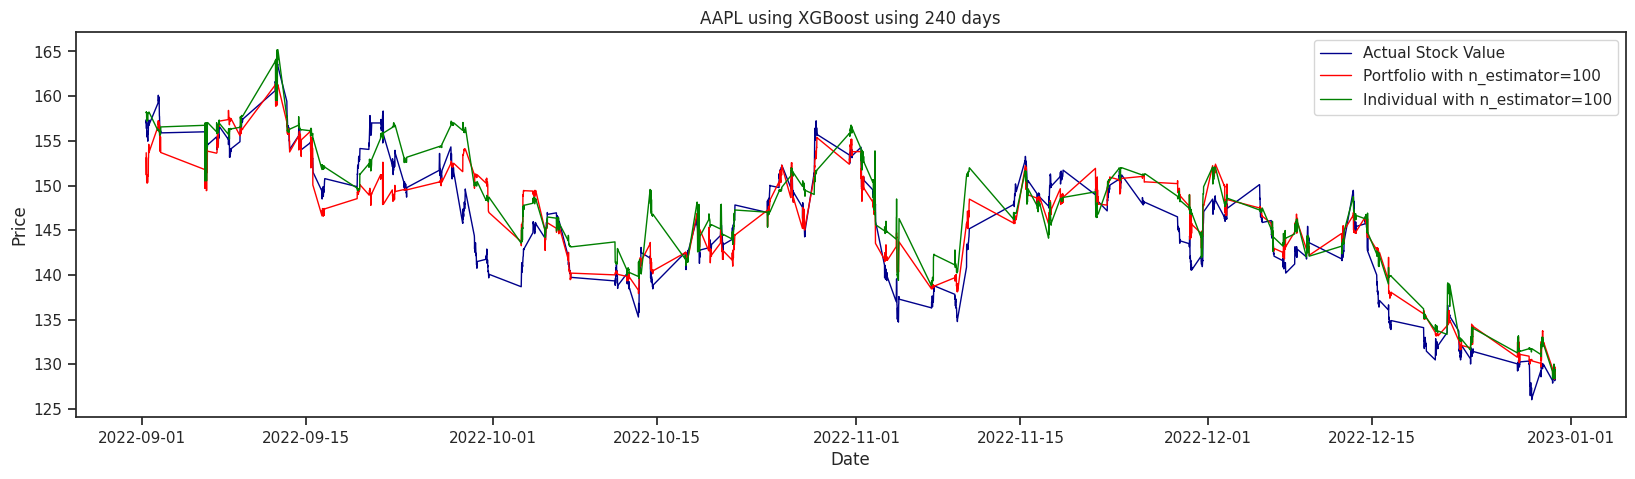

In [14]:
plt.figure(figsize=(20,5))
sns.set(style='ticks')
linewidth=1
sns.lineplot(data=AAPL_240_100,x='DATETIME',y='ACTUAL',label='Actual Stock Value',linewidth=linewidth, color='darkblue')
sns.lineplot(data=AAPL_240_100,x='DATETIME',y='PREDICTED_Portfolio',label='Portfolio with n_estimator=100',linewidth=linewidth,color='red') # Although the 300 model showed slightly better results in terms of MAPE and MPE metrics, the 100 model was chosen due to its lower MTT.
sns.lineplot(data=AAPL_240_100,x='DATETIME',y='PREDICTED_stock',label='Individual with n_estimator=100',linewidth=linewidth,color='green')  #Although the 300 model showed slightly better results in terms of MAPE and MPE metrics, the 100 model was chosen due to its lower MTT.
#sns.lineplot(data=AAPL_240_300,x='DATETIME',y='PREDICTED_Portfolio',label='Portfolio300',linewidth=linewidth)
#sns.lineplot(data=AAPL_240_300,x='DATETIME',y='PREDICTED_stock',label='Individual300',linewidth=linewidth)
plt.title('AAPL using XGBoost using 240 days')
plt.ylabel('Price')
plt.xlabel('Date')

plt.show()

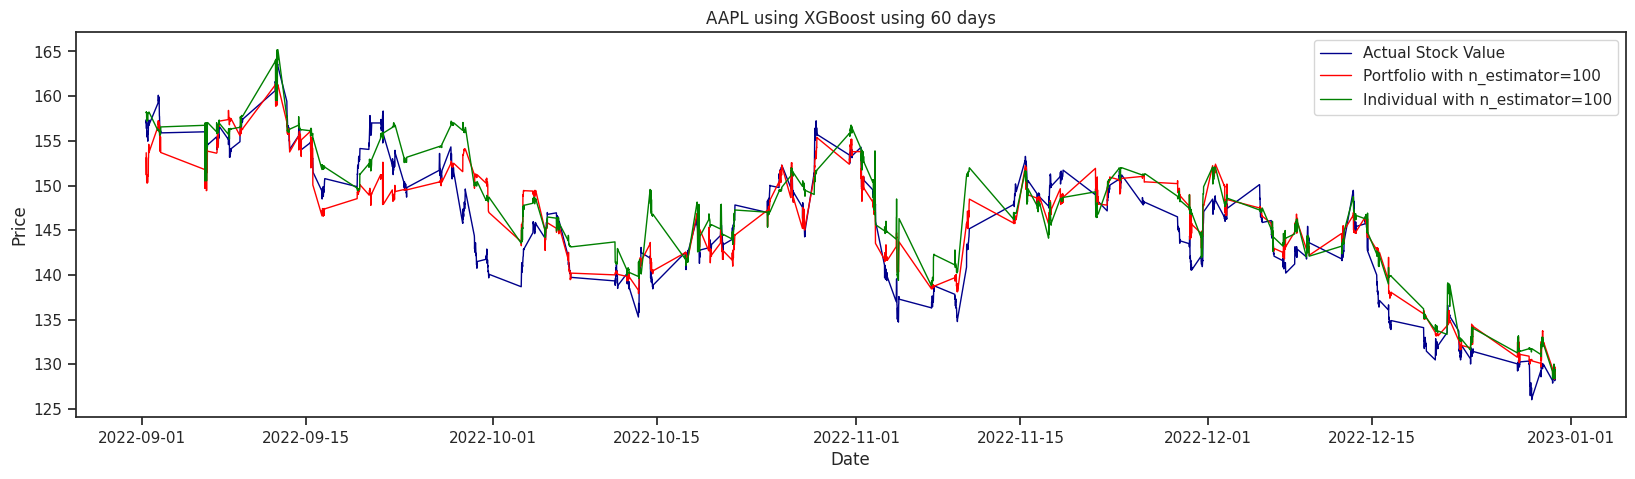

In [15]:
plt.figure(figsize=(20,5))
sns.set(style='ticks')
linewidth=1
sns.lineplot(data=AAPL_60_100,x='DATETIME',y='ACTUAL',label='Actual Stock Value',linewidth=linewidth, color='darkblue')
sns.lineplot(data=AAPL_60_100,x='DATETIME',y='PREDICTED_Portfolio',label='Portfolio with n_estimator=100',linewidth=linewidth,color='red') # Although the 300 model showed slightly better results in terms of MAPE and MPE metrics, the 100 model was chosen due to its lower MTT.
sns.lineplot(data=AAPL_60_100,x='DATETIME',y='PREDICTED_stock',label='Individual with n_estimator=100',linewidth=linewidth,color='green')  #Although the 300 model showed slightly better results in terms of MAPE and MPE metrics, the 100 model was chosen due to its lower MTT.
#sns.lineplot(data=AAPL_60_300,x='DATETIME',y='PREDICTED_Portfolio',label='Portfolio300',linewidth=linewidth)
#sns.lineplot(data=AAPL_60_300,x='DATETIME',y='PREDICTED_stock',label='Individual300',linewidth=linewidth)
plt.title('AAPL using XGBoost using 60 days')
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()

##F

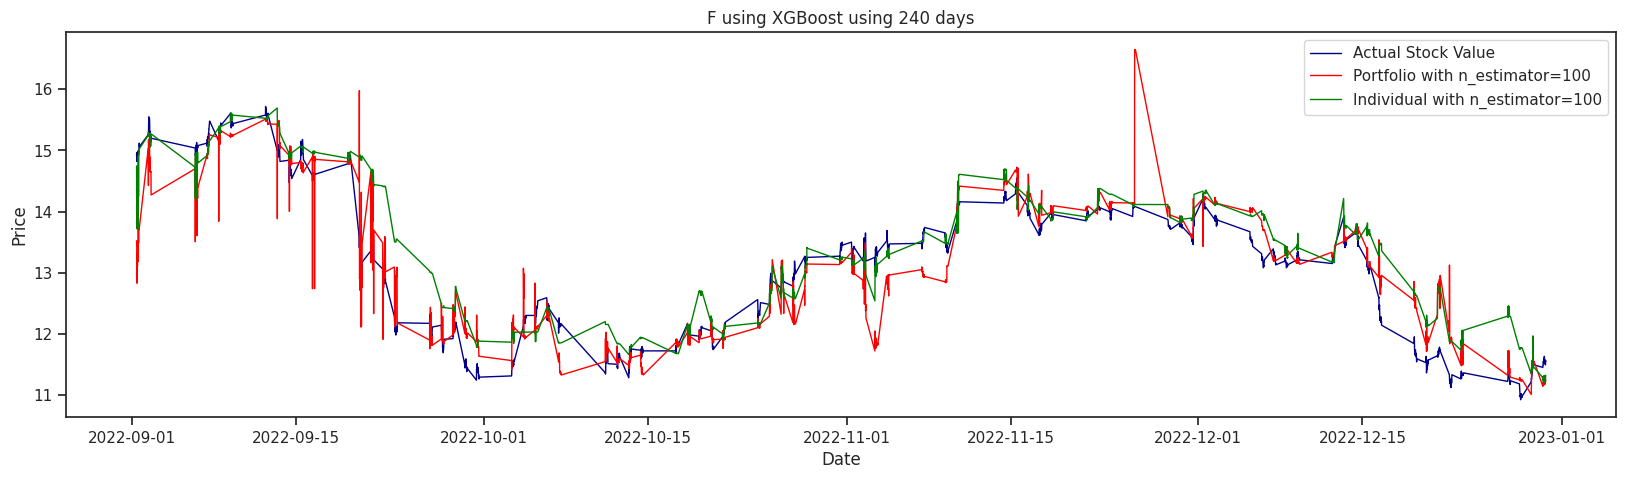

In [16]:
plt.figure(figsize=(20,5))
sns.set(style='ticks')
linewidth=1
sns.lineplot(data=F_240_100,x='DATETIME',y='ACTUAL',label='Actual Stock Value',linewidth=linewidth, color='darkblue')
sns.lineplot(data=F_240_100,x='DATETIME',y='PREDICTED_Portfolio',label='Portfolio with n_estimator=100',linewidth=linewidth,color='red') # Although the 300 model showed slightly better results in terms of MAPE and MPE metrics, the 100 model was chosen due to its lower MTT.
sns.lineplot(data=F_240_100,x='DATETIME',y='PREDICTED_stock',label='Individual with n_estimator=100',linewidth=linewidth,color='green')  #Although the 300 model showed slightly better results in terms of MAPE and MPE metrics, the 100 model was chosen due to its lower MTT.
#sns.lineplot(data=F_240_300,x='DATETIME',y='PREDICTED_Portfolio',label='Portfolio300',linewidth=linewidth)
#sns.lineplot(data=F_240_300,x='DATETIME',y='PREDICTED_stock',label='Individual300',linewidth=linewidth)
plt.title('F using XGBoost using 240 days')
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()

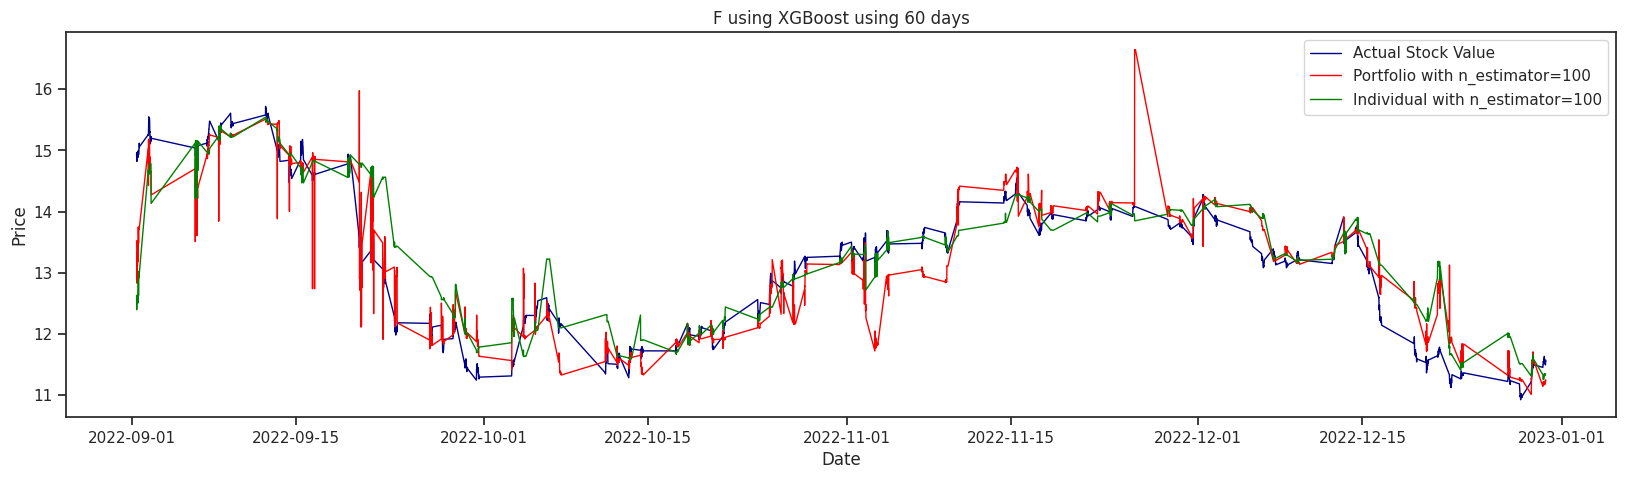

In [17]:
plt.figure(figsize=(20,5))
sns.set(style='ticks')
linewidth=1
sns.lineplot(data=F_60_100,x='DATETIME',y='ACTUAL',label='Actual Stock Value',linewidth=linewidth, color='darkblue')
sns.lineplot(data=F_60_100,x='DATETIME',y='PREDICTED_Portfolio',label='Portfolio with n_estimator=100',linewidth=linewidth,color='red') # Although the 300 model showed slightly better results in terms of MAPE and MPE metrics, the 100 model was chosen due to its lower MTT.
sns.lineplot(data=F_60_100,x='DATETIME',y='PREDICTED_stock',label='Individual with n_estimator=100',linewidth=linewidth,color='green')  #Although the 300 model showed slightly better results in terms of MAPE and MPE metrics, the 100 model was chosen due to its lower MTT.
#sns.lineplot(data=F_60_300,x='DATETIME',y='PREDICTED_Portfolio',label='Portfolio300',linewidth=linewidth)
#sns.lineplot(data=F_60_300,x='DATETIME',y='PREDICTED_stock',label='Individual300',linewidth=linewidth)
plt.title('F using XGBoost using 60 days')
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()

##TSLA

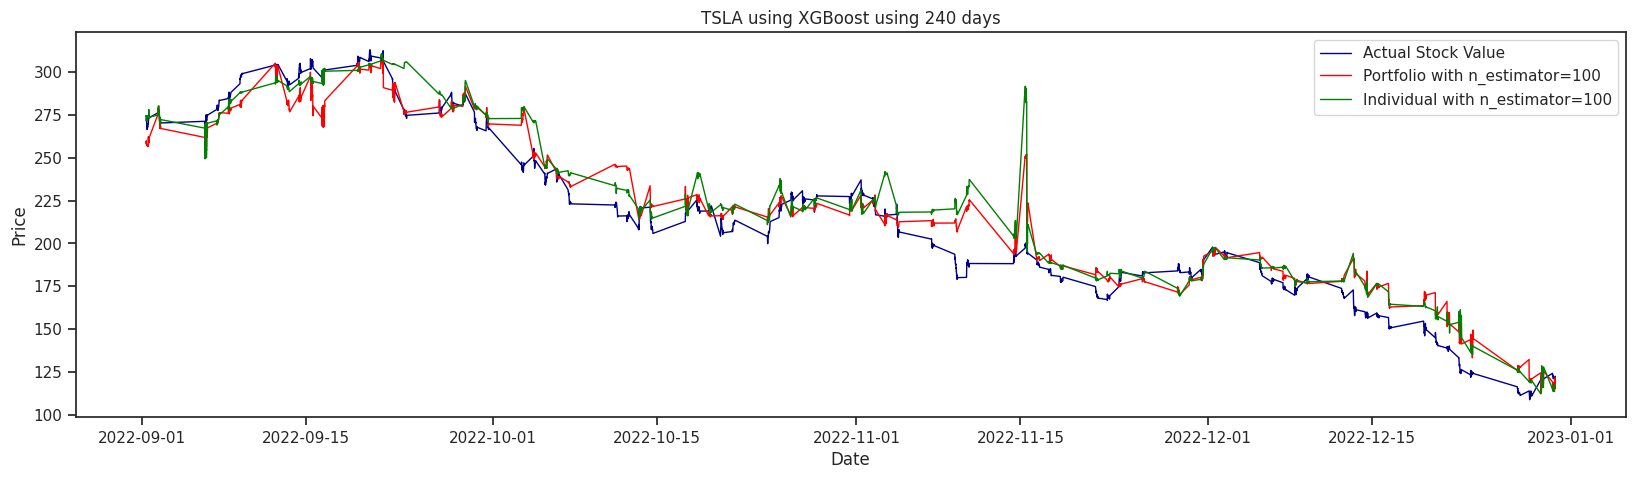

In [18]:
plt.figure(figsize=(20,5))
sns.set(style='ticks')
linewidth=1
sns.lineplot(data=TSLA_240_100,x='DATETIME',y='ACTUAL',label='Actual Stock Value',linewidth=linewidth, color='darkblue')
sns.lineplot(data=TSLA_240_100,x='DATETIME',y='PREDICTED_Portfolio',label='Portfolio with n_estimator=100',linewidth=linewidth,color='red') # Although the 300 model showed slightly better results in terms oTSLA MAPE and MPE metrics, the 100 model was chosen due to its lower MTT.
sns.lineplot(data=TSLA_240_100,x='DATETIME',y='PREDICTED_stock',label='Individual with n_estimator=100',linewidth=linewidth,color='green')  #Although the 300 model showed slightly better results in terms oTSLA MAPE and MPE metrics, the 100 model was chosen due to its lower MTT.
#sns.lineplot(data=TSLA_240_300,x='DATETIME',y='PREDICTED_PortTSLAolio',label='PortTSLAolio300',linewidth=linewidth)
#sns.lineplot(data=TSLA_240_300,x='DATETIME',y='PREDICTED_stock',label='Individual300',linewidth=linewidth)
plt.title('TSLA using XGBoost using 240 days')
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()

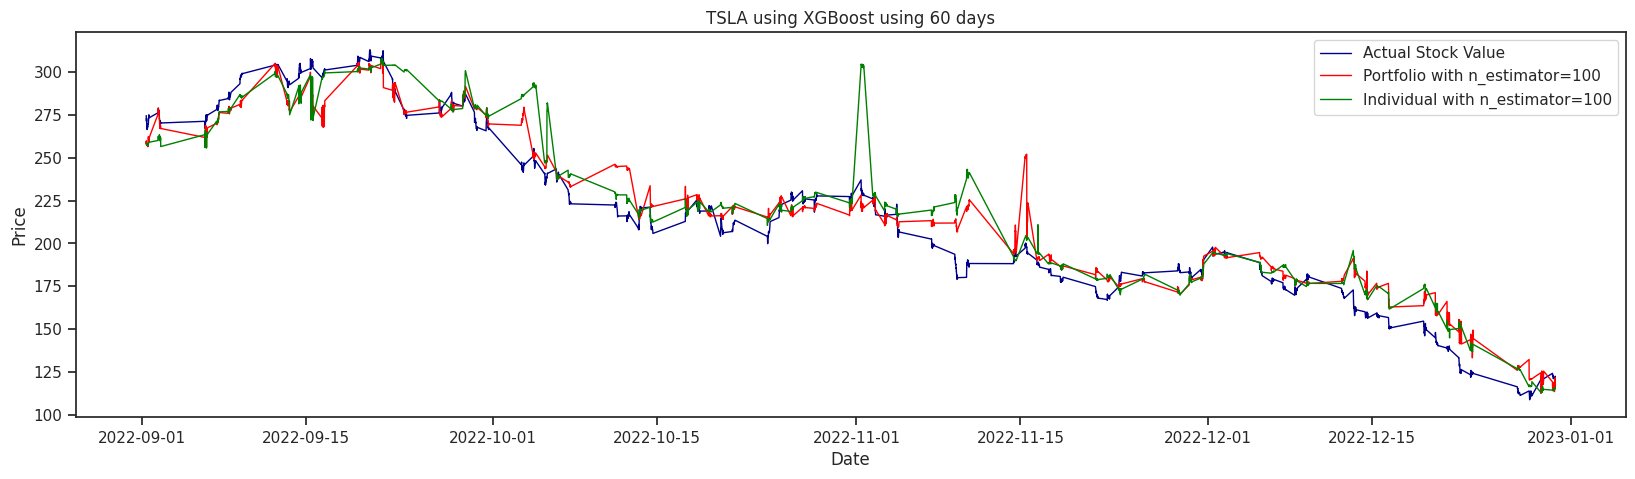

In [19]:
plt.figure(figsize=(20,5))
sns.set(style='ticks')
linewidth=1
sns.lineplot(data=TSLA_60_100,x='DATETIME',y='ACTUAL',label='Actual Stock Value',linewidth=linewidth, color='darkblue')
sns.lineplot(data=TSLA_60_100,x='DATETIME',y='PREDICTED_Portfolio',label='Portfolio with n_estimator=100',linewidth=linewidth,color='red') # Although the 300 model showed slightly better results in terms of MAPE and MPE metrics, the 100 model was chosen due to its lower MTT.
sns.lineplot(data=TSLA_60_100,x='DATETIME',y='PREDICTED_stock',label='Individual with n_estimator=100',linewidth=linewidth,color='green')  #Although the 300 model showed slightly better results in terms of MAPE and MPE metrics, the 100 model was chosen due to its lower MTT.
#sns.lineplot(data=TSLA_60_300,x='DATETIME',y='PREDICTED_Portfolio',label='Portfolio300',linewidth=linewidth)
#sns.lineplot(data=TSLA_60_300,x='DATETIME',y='PREDICTED_stock',label='Individual300',linewidth=linewidth)
plt.title('TSLA using XGBoost using 60 days')
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()

##WMT

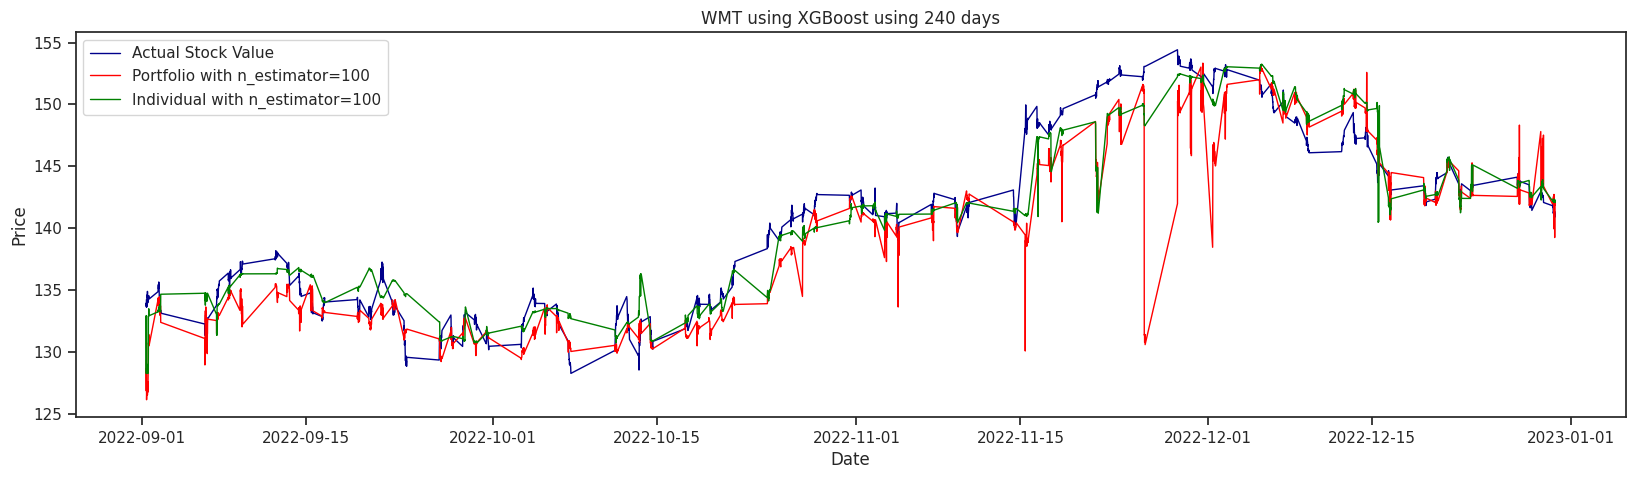

In [20]:
plt.figure(figsize=(20,5))
sns.set(style='ticks')
linewidth=1
sns.lineplot(data=WMT_240_100,x='DATETIME',y='ACTUAL',label='Actual Stock Value',linewidth=linewidth, color='darkblue')
sns.lineplot(data=WMT_240_100,x='DATETIME',y='PREDICTED_Portfolio',label='Portfolio with n_estimator=100',linewidth=linewidth,color='red') # Although the 300 model showed slightly better results in terms oWMT MAPE and MPE metrics, the 100 model was chosen due to its lower MTT.
sns.lineplot(data=WMT_240_100,x='DATETIME',y='PREDICTED_stock',label='Individual with n_estimator=100',linewidth=linewidth,color='green')  #Although the 300 model showed slightly better results in terms oWMT MAPE and MPE metrics, the 100 model was chosen due to its lower MTT.
#sns.lineplot(data=WMT_240_300,x='DATETIME',y='PREDICTED_PortWMTolio',label='PortWMTolio300',linewidth=linewidth)
#sns.lineplot(data=WMT_240_300,x='DATETIME',y='PREDICTED_stock',label='Individual300',linewidth=linewidth)
plt.title('WMT using XGBoost using 240 days')
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()

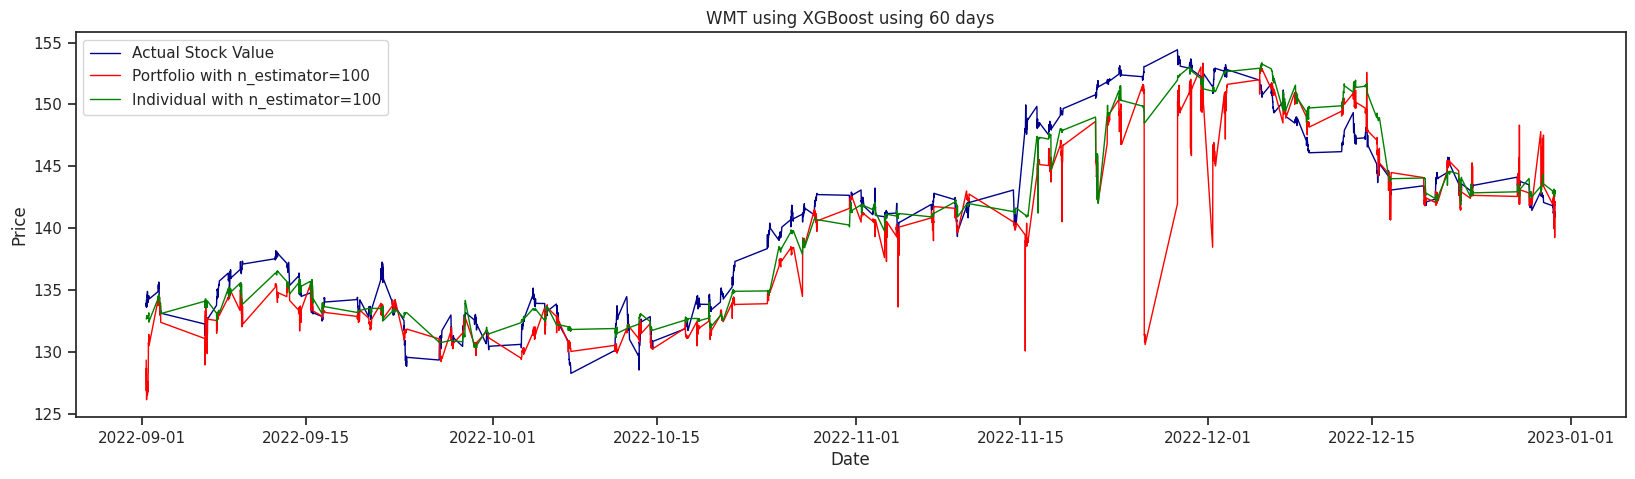

In [21]:
plt.figure(figsize=(20,5))
sns.set(style='ticks')
linewidth=1
sns.lineplot(data=WMT_60_100,x='DATETIME',y='ACTUAL',label='Actual Stock Value',linewidth=linewidth, color='darkblue')
sns.lineplot(data=WMT_60_100,x='DATETIME',y='PREDICTED_Portfolio',label='Portfolio with n_estimator=100',linewidth=linewidth,color='red') # Although the 300 model showed slightly better results in terms of MAPE and MPE metrics, the 100 model was chosen due to its lower MTT.
sns.lineplot(data=WMT_60_100,x='DATETIME',y='PREDICTED_stock',label='Individual with n_estimator=100',linewidth=linewidth,color='green')  #Although the 300 model showed slightly better results in terms of MAPE and MPE metrics, the 100 model was chosen due to its lower MTT.
#sns.lineplot(data=WMT_60_300,x='DATETIME',y='PREDICTED_Portfolio',label='Portfolio300',linewidth=linewidth)
#sns.lineplot(data=WMT_60_300,x='DATETIME',y='PREDICTED_stock',label='Individual300',linewidth=linewidth)
plt.title('WMT using XGBoost using 60 days')
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()